C:\Users\Nimith Narapareddy\AppData\Local\Temp\ipykernel_21644\3706900678.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')
MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

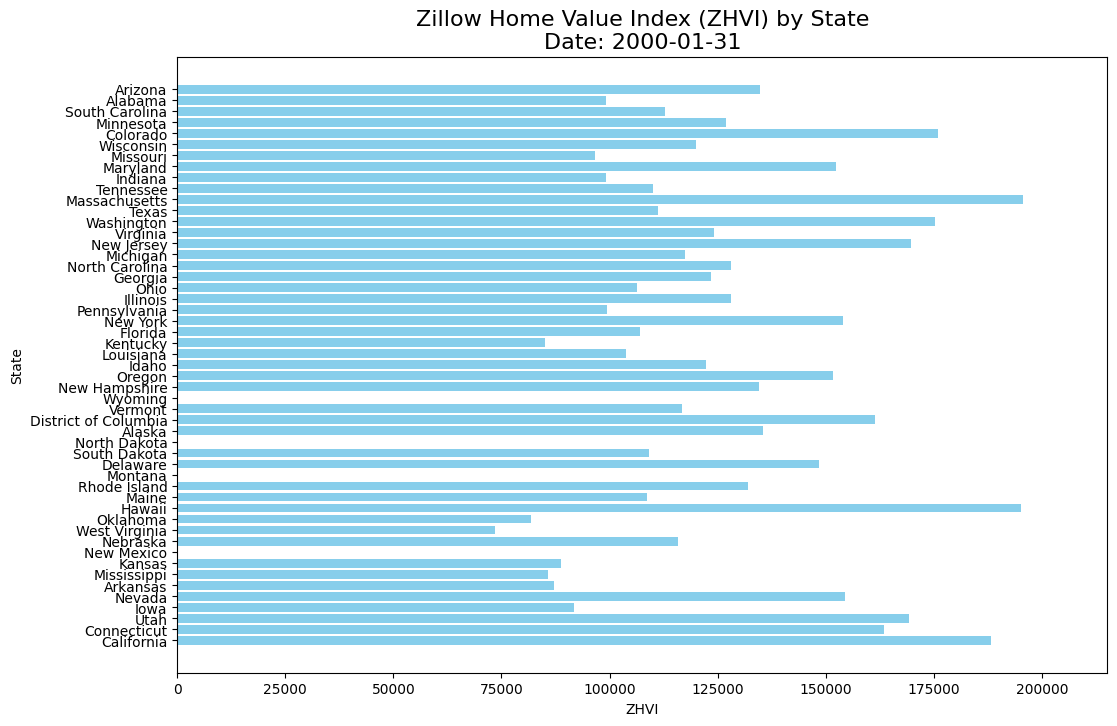

In [1]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File path (adjust as necessary)
file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Transform the data into long format for easier mapping
data_long = pd.melt(data, id_vars=['RegionName'], var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')

# Ensure the Date column is correctly sorted
data_long = data_long.dropna(subset=['Date']).sort_values(by='Date')

# Create a figure for animation
fig, ax = plt.subplots(figsize=(12, 8))

# Function to create each frame of the animation
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by State\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = data_long[data_long['Date'] == date]
    
    # Create a bar chart
    ax.barh(plot_data['RegionName'], plot_data['ZHVI'], color='skyblue')
    ax.set_xlabel('ZHVI')
    ax.set_ylabel('State')
    ax.set_xlim(0, plot_data['ZHVI'].max() * 1.1)

# Create an animation
dates = data_long['Date'].unique()
anim = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation
animation_file = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_time_lapse.mp4"
anim.save(animation_file, writer='ffmpeg', fps=2)

print(f"Animation saved as {animation_file}")


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

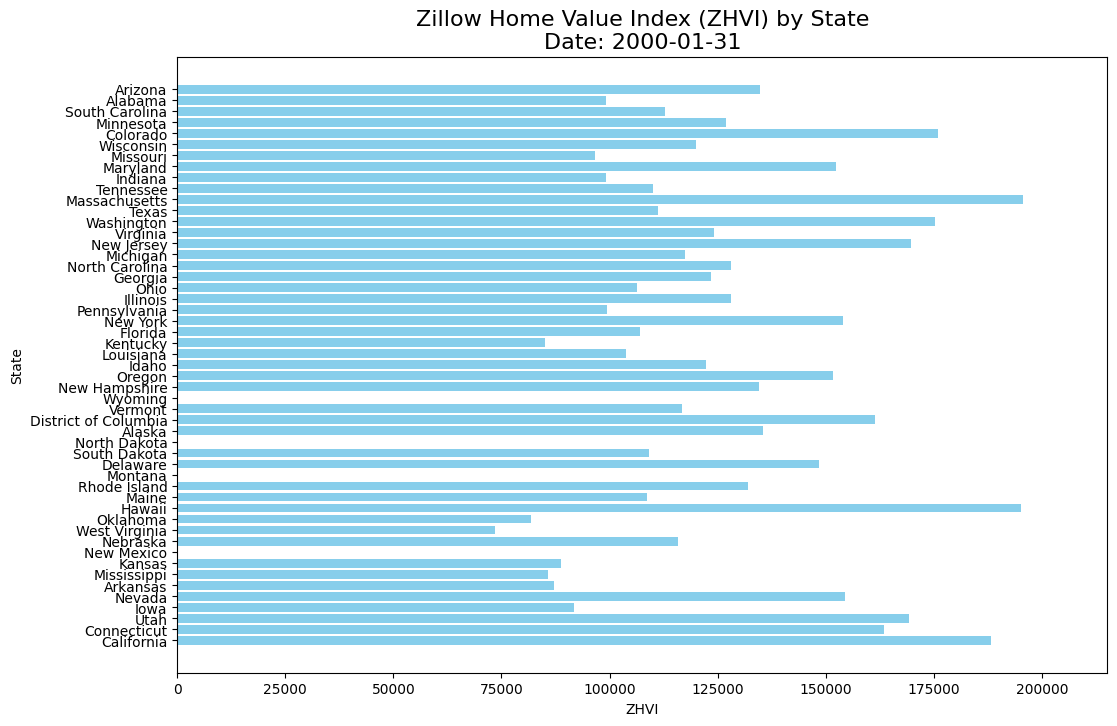

In [2]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File path (adjust as necessary)
file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Transform the data into long format for easier mapping
data_long = pd.melt(data, id_vars=['RegionName'], var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')

# Ensure the Date column is correctly sorted
data_long = data_long.dropna(subset=['Date']).sort_values(by='Date')

# Create a figure for animation
fig, ax = plt.subplots(figsize=(12, 8))

# Function to create each frame of the animation
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by State\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = data_long[data_long['Date'] == date]
    
    # Create a bar chart
    ax.barh(plot_data['RegionName'], plot_data['ZHVI'], color='skyblue')
    ax.set_xlabel('ZHVI')
    ax.set_ylabel('State')
    ax.set_xlim(0, plot_data['ZHVI'].max() * 1.1)

# Create an animation
dates = data_long['Date'].unique()
anim = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation using ffmpeg
animation_file = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_time_lapse.mp4"
anim.save(animation_file, writer='ffmpeg', fps=2)

print(f"Animation saved as {animation_file}")


In [3]:
pip install pandas geopandas matplotlib shapely descartes


  Obtaining dependency information for descartes from https://files.pythonhosted.org/packages/e5/b6/1ed2eb03989ae574584664985367ba70cd9cf8b32ee8cad0e8aaeac819f3/descartes-1.1.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File paths (adjust as necessary)
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\cb_2018_us_cbsa_500k.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)

# Load the US states shapefile
us_states = gpd.read_file(shapefile_path)

# Standardize state names in the data and shapefile to enable merging
us_states['RegionName'] = us_states['STUSPS'].apply(lambda x: x.title())

# Remove unwanted regions like Puerto Rico and Alaska if necessary
us_states = us_states[~us_states['RegionName'].isin(['Pr', 'Ak', 'Hi'])]

# Transform the data into long format for easier plotting
data_long = pd.melt(data, id_vars=['RegionName'], var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')

# Merge the geometrical data with the Zillow data
merged_data = us_states.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a function to update the map for each date frame
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by State\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot the US states boundaries
    us_states.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')
    
    # Remove axis
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
anim = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation to a video file
output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_map_animation.mp4"
anim.save(output_path, writer='ffmpeg', fps=2)

print(f"Animation saved as {output_path}")


KeyError: 'STUSPS'

MovieWriter ffmpeg unavailable; using Pillow instead.


Shapefile Columns: Index(['CSAFP', 'CBSAFP', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND',
       'AWATER', 'geometry'],
      dtype='object')


C:\Users\Nimith Narapareddy\anaconda3\Lib\site-packages\matplotlib\animation.py:1739: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


IndexError: list index out of range

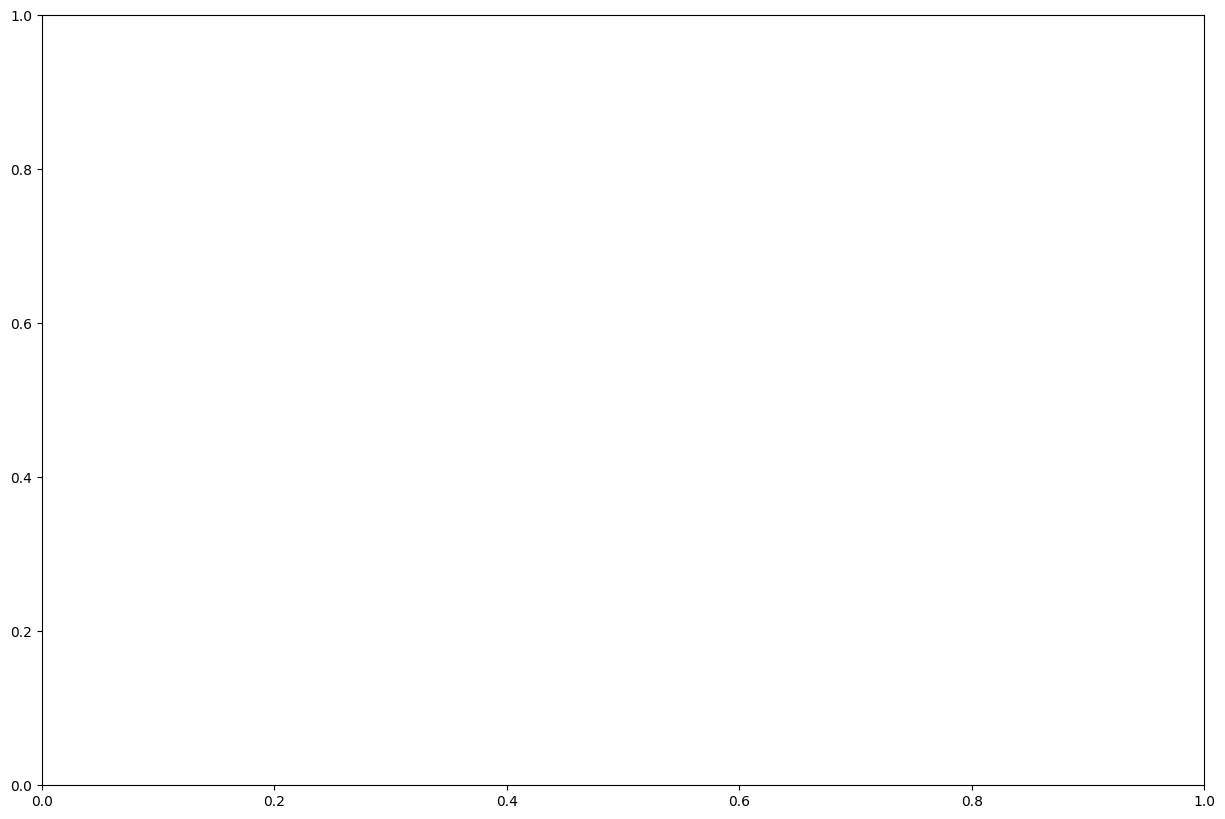

In [6]:
# Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File paths (adjust these as necessary)
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\cb_2018_us_cbsa_500k.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)

# Load the US states shapefile using Geopandas
us_states = gpd.read_file(shapefile_path)

# Display available columns in the shapefile to check for compatibility
print("Shapefile Columns:", us_states.columns)

# Use the 'NAME' column in the shapefile to match with 'RegionName' in the data
us_states['RegionName'] = us_states['NAME'].apply(lambda x: x.title())

# Remove unwanted regions like Puerto Rico, Alaska, and Hawaii if necessary
us_states = us_states[~us_states['RegionName'].isin(['Puerto Rico', 'Alaska', 'Hawaii'])]

# Transform the data into long format for easier plotting
data_long = pd.melt(data, id_vars=['RegionName'], var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')

# Merge the geometrical data with the Zillow data
merged_data = us_states.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a function to update the map for each date frame
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by State\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot the US states boundaries
    us_states.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')
    
    # Remove axis
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
anim = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation to a video file
output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_map_animation.mp4"
anim.save(output_path, writer='ffmpeg', fps=2)

print(f"Animation saved as {output_path}")


Zillow Data Sample:
    RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  188275.958362   
1        54         1         Texas      state        NaN  111198.886345   
2        14         2       Florida      state        NaN  106961.891667   
3        43         3      New York      state        NaN  153909.362354   
4        47         4  Pennsylvania      state        NaN   99440.385196   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  188908.810055  189763.314808  191618.189838  193774.202640  ...   
1  111259.314692  111288.623387  111434.085040  111528.288287  ...   
2  107193.581081  107474.434834  108045.338277  108660.996118  ...   
3  154457.430871  154985.035203  156119.768693  157293.812224  ...   
4   99653.080649   99852.957241  100260.275364  100678.693064  ...   

      2023-11-30     2023-12-31     2024-01-31     2024-02-29     2024-03-31  \
0  754055.377884  756

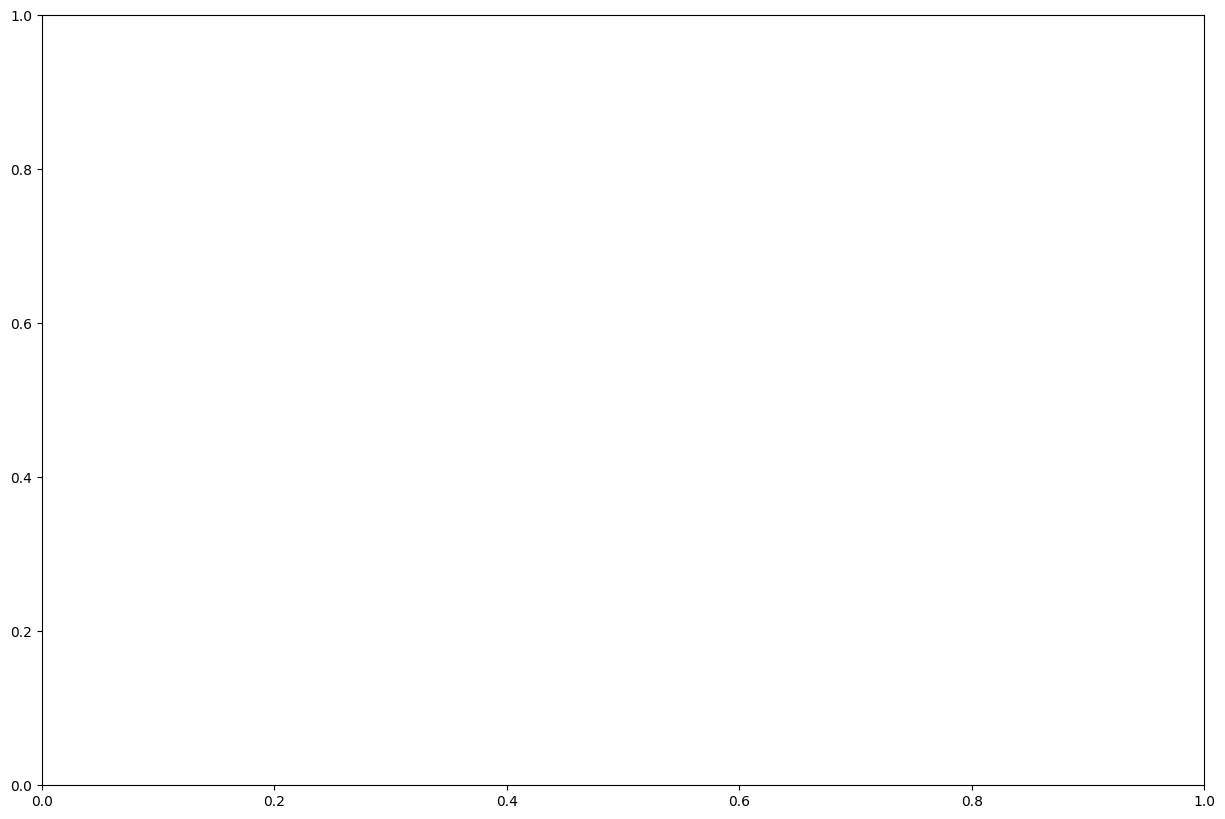

In [8]:
# Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File paths (adjust these as necessary)
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\cb_2018_us_cbsa_500k.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)
print("Zillow Data Sample:\n", data.head())

# Load the US states shapefile using Geopandas
us_states = gpd.read_file(shapefile_path)
print("Shapefile Data Sample:\n", us_states.head())

# Display available columns in the shapefile to check for compatibility
print("Shapefile Columns:", us_states.columns)

# Use the 'NAME' column in the shapefile to match with 'RegionName' in the data
us_states['RegionName'] = us_states['NAME'].apply(lambda x: x.title())

# Remove unwanted regions like Puerto Rico, Alaska, and Hawaii if necessary
us_states = us_states[~us_states['RegionName'].isin(['Puerto Rico', 'Alaska', 'Hawaii'])]

# Transform the data into long format for easier plotting
data_long = pd.melt(data, id_vars=['RegionName'], var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')

# Check for missing or malformed data
print("Transformed Data Sample:\n", data_long.head())

# Merge the geometrical data with the Zillow data
merged_data = us_states.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Check for missing or incorrect date values
print("Merged Data Sample:\n", merged_data.head())
print("Unique Dates in Merged Data:\n", merged_data['Date'].unique())

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a function to update the map for each date frame
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by State\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot the US states boundaries
    us_states.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')
    
    # Remove axis
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    anim = FuncAnimation(fig, update, frames=dates, repeat=False)

    # Save the animation to a video file
    output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_map_animation.mp4"
    anim.save(output_path, writer='ffmpeg', fps=2)

    print(f"Animation saved as {output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


Zillow Data Sample:
    RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  188275.958362   
1        54         1         Texas      state        NaN  111198.886345   
2        14         2       Florida      state        NaN  106961.891667   
3        43         3      New York      state        NaN  153909.362354   
4        47         4  Pennsylvania      state        NaN   99440.385196   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  188908.810055  189763.314808  191618.189838  193774.202640  ...   
1  111259.314692  111288.623387  111434.085040  111528.288287  ...   
2  107193.581081  107474.434834  108045.338277  108660.996118  ...   
3  154457.430871  154985.035203  156119.768693  157293.812224  ...   
4   99653.080649   99852.957241  100260.275364  100678.693064  ...   

      2023-11-30     2023-12-31     2024-01-31     2024-02-29     2024-03-31  \
0  754055.377884  756

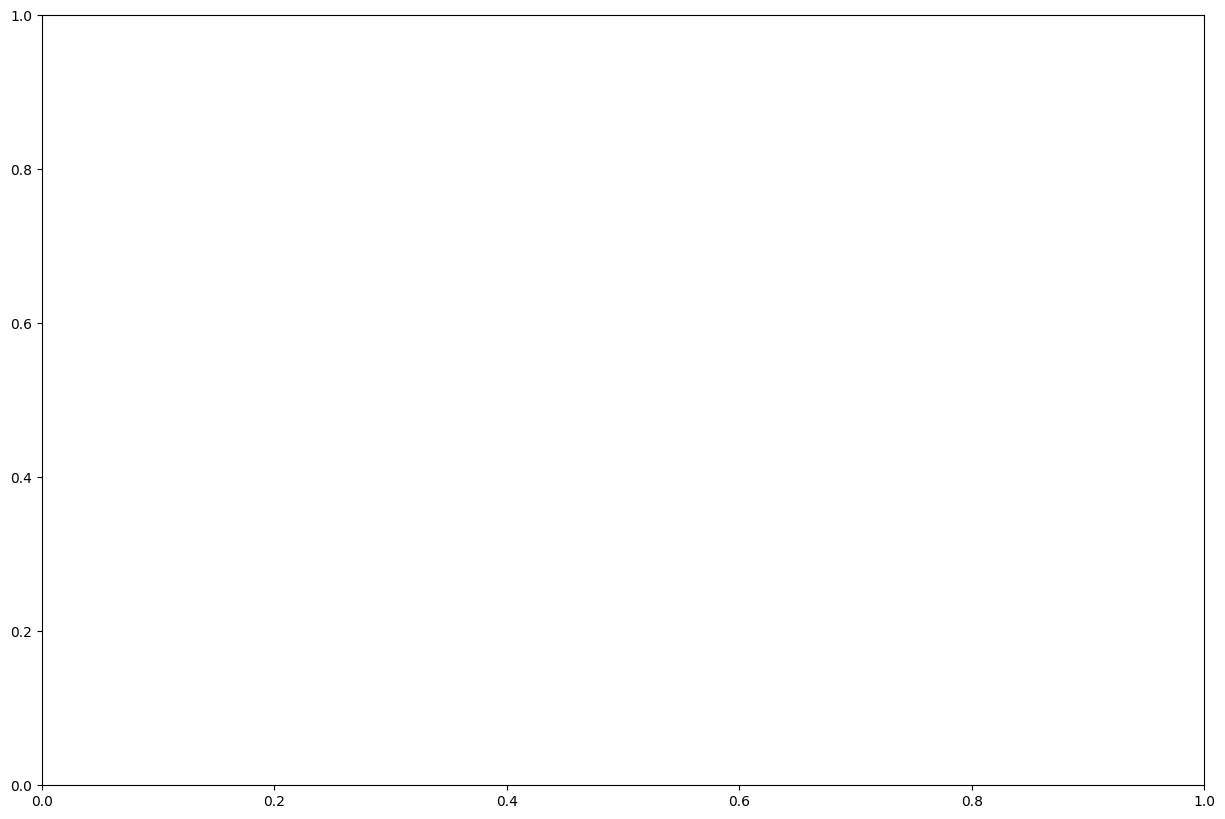

In [9]:
# Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File paths (adjust these as necessary)
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\cb_2018_us_cbsa_500k.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)
print("Zillow Data Sample:\n", data.head())

# Extract only the date columns (excluding non-date columns)
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in data.columns if col not in non_date_columns]
print(f"Date Columns: {date_columns[:5]} ... {date_columns[-5:]}")  # Show a few date columns for reference

# Melt the data so that each date column becomes a row entry in a new 'Date' column
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')

# Convert the 'Date' column to datetime format
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')
print("Transformed Data Sample After Date Conversion:\n", data_long.head())

# Load the US states shapefile using Geopandas
us_states = gpd.read_file(shapefile_path)
print("Shapefile Data Sample:\n", us_states.head())

# Standardize the 'NAME' column in shapefile to match Zillow 'RegionName'
us_states['RegionName'] = us_states['NAME'].apply(lambda x: x.title())

# Remove unwanted regions like Puerto Rico, Alaska, and Hawaii if necessary
us_states = us_states[~us_states['RegionName'].isin(['Puerto Rico', 'Alaska', 'Hawaii'])]

# Merge the geometrical data with the Zillow data
merged_data = us_states.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Check for missing or incorrect date values
print("Merged Data Sample After Merge:\n", merged_data.head())
print("Unique Dates in Merged Data:\n", merged_data['Date'].unique())

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a function to update the map for each date frame
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by State\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot the US states boundaries
    us_states.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')
    
    # Remove axis
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    anim = FuncAnimation(fig, update, frames=dates, repeat=False)

    # Save the animation to a video file
    output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_map_animation.mp4"
    anim.save(output_path, writer='ffmpeg', fps=2)

    print(f"Animation saved as {output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


Zillow Data Sample:
    RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  188275.958362   
1        54         1         Texas      state        NaN  111198.886345   
2        14         2       Florida      state        NaN  106961.891667   
3        43         3      New York      state        NaN  153909.362354   
4        47         4  Pennsylvania      state        NaN   99440.385196   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  188908.810055  189763.314808  191618.189838  193774.202640  ...   
1  111259.314692  111288.623387  111434.085040  111528.288287  ...   
2  107193.581081  107474.434834  108045.338277  108660.996118  ...   
3  154457.430871  154985.035203  156119.768693  157293.812224  ...   
4   99653.080649   99852.957241  100260.275364  100678.693064  ...   

      2023-11-30     2023-12-31     2024-01-31     2024-02-29     2024-03-31  \
0  754055.377884  756

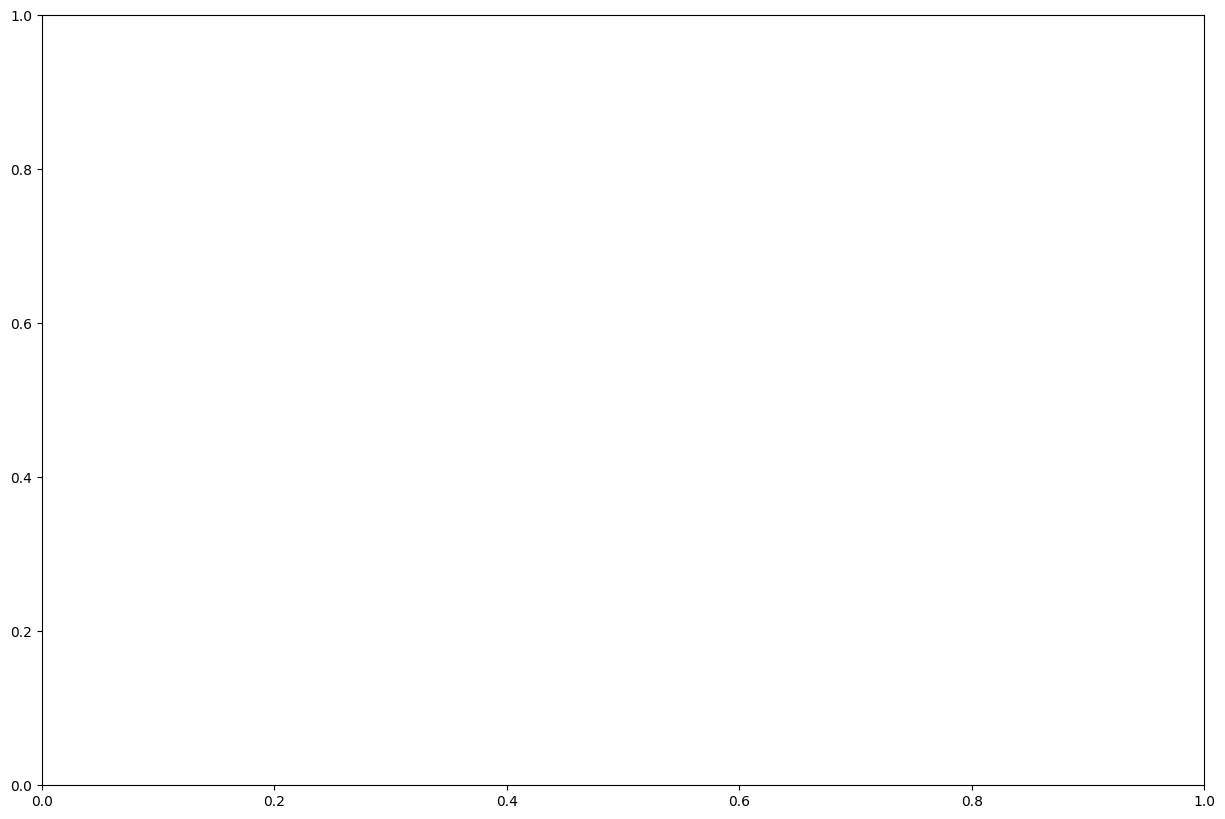

In [10]:
# Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File paths (adjust these as necessary)
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
cbsa_shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\cb_2018_us_cbsa_500k.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)
print("Zillow Data Sample:\n", data.head())

# Extract only the date columns (excluding non-date columns)
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in data.columns if col not in non_date_columns]
print(f"Date Columns: {date_columns[:5]} ... {date_columns[-5:]}")  # Show a few date columns for reference

# Melt the data so that each date column becomes a row entry in a new 'Date' column
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')

# Convert the 'Date' column to datetime format
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')
print("Transformed Data Sample After Date Conversion:\n", data_long.head())

# Load the CBSA shapefile using Geopandas
cbsa_geo = gpd.read_file(cbsa_shapefile_path)
print("CBSA Shapefile Data Sample:\n", cbsa_geo.head())

# Display available columns in the CBSA shapefile to check for compatibility
print("CBSA Shapefile Columns:", cbsa_geo.columns)

# Check unique values in 'RegionName' and 'NAME'
unique_region_names = data_long['RegionName'].unique()
unique_shapefile_names = cbsa_geo['NAME'].unique()

# Print unique RegionName values for comparison
print("Unique Region Names in Zillow Data:\n", unique_region_names)
print("Unique Region Names in Shapefile:\n", unique_shapefile_names)

# If necessary, create a mapping dictionary between 'RegionName' in Zillow and 'NAME' in shapefile
# Example: {'Zillow Name': 'Shapefile Name'}
region_mapping = {
    'New York': 'New York, NY',
    'California': 'Los Angeles-Long Beach-Anaheim, CA',
    'Texas': 'Dallas-Fort Worth-Arlington, TX',
    # Add other mappings as necessary
}

# Apply mapping to Zillow data to match with shapefile names
data_long['RegionName'] = data_long['RegionName'].map(region_mapping).fillna(data_long['RegionName'])

# Standardize 'NAME' column in shapefile to match Zillow 'RegionName'
cbsa_geo['RegionName'] = cbsa_geo['NAME'].apply(lambda x: x.title())

# Merge the geometrical data with the Zillow data
merged_data = cbsa_geo.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Check for missing or incorrect date values
print("Merged Data Sample After Merge:\n", merged_data.head())
print("Unique Dates in Merged Data:\n", merged_data['Date'].unique())

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a function to update the map for each date frame
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by State\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot the US states boundaries
    cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')
    
    # Remove axis
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    anim = FuncAnimation(fig, update, frames=dates, repeat=False)

    # Save the animation to a video file
    output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_map_animation.mp4"
    anim.save(output_path, writer='ffmpeg', fps=2)

    print(f"Animation saved as {output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


Zillow Data Sample:
    RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  188275.958362   
1        54         1         Texas      state        NaN  111198.886345   
2        14         2       Florida      state        NaN  106961.891667   
3        43         3      New York      state        NaN  153909.362354   
4        47         4  Pennsylvania      state        NaN   99440.385196   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  188908.810055  189763.314808  191618.189838  193774.202640  ...   
1  111259.314692  111288.623387  111434.085040  111528.288287  ...   
2  107193.581081  107474.434834  108045.338277  108660.996118  ...   
3  154457.430871  154985.035203  156119.768693  157293.812224  ...   
4   99653.080649   99852.957241  100260.275364  100678.693064  ...   

      2023-11-30     2023-12-31     2024-01-31     2024-02-29     2024-03-31  \
0  754055.377884  756

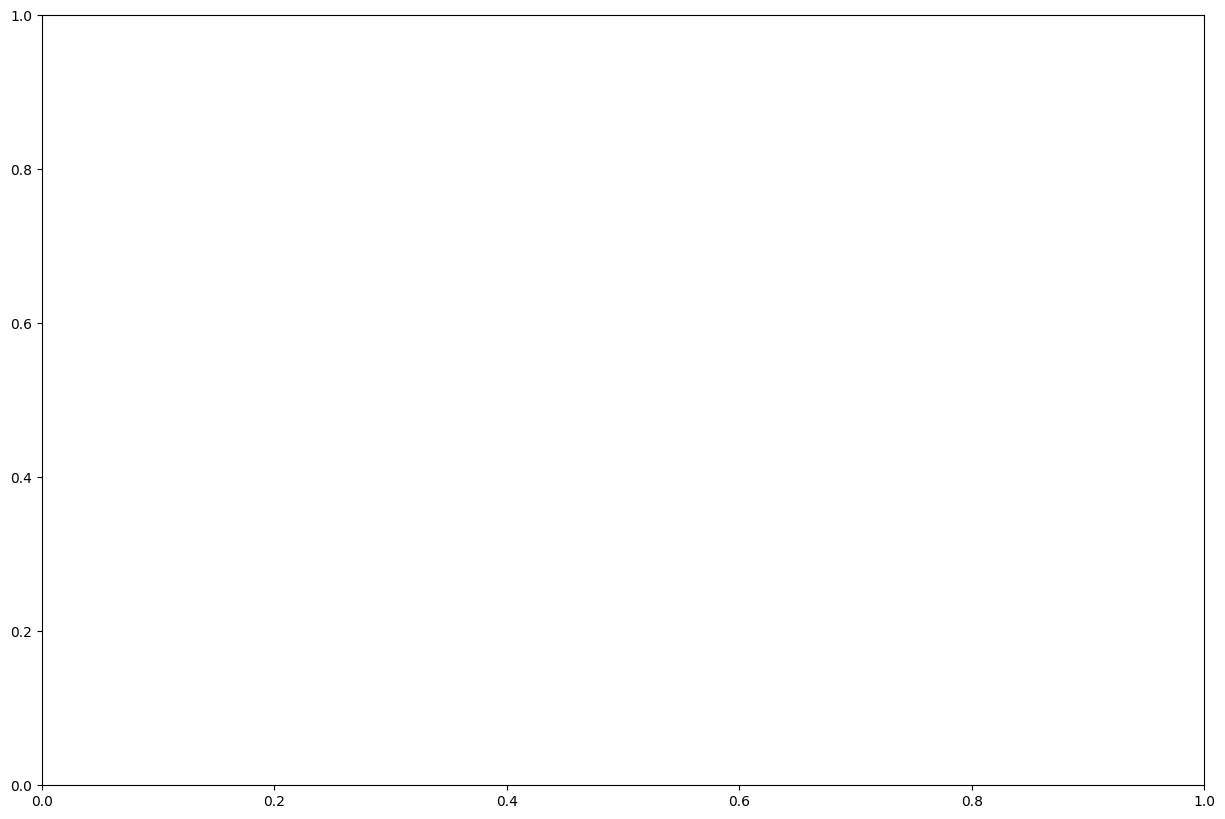

In [11]:
# Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File paths (adjust these as necessary)
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
cbsa_shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\tl_2023_us_cbsa.shp"  # New CBSA shapefile

# Load the Zillow data
data = pd.read_csv(data_file_path)
print("Zillow Data Sample:\n", data.head())

# Extract only the date columns (excluding non-date columns)
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in data.columns if col not in non_date_columns]
print(f"Date Columns: {date_columns[:5]} ... {date_columns[-5:]}")  # Show a few date columns for reference

# Melt the data so that each date column becomes a row entry in a new 'Date' column
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')

# Convert the 'Date' column to datetime format
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')
print("Transformed Data Sample After Date Conversion:\n", data_long.head())

# Load the CBSA shapefile using Geopandas
cbsa_geo = gpd.read_file(cbsa_shapefile_path)
print("CBSA Shapefile Data Sample:\n", cbsa_geo.head())

# Display available columns in the CBSA shapefile to check for compatibility
print("CBSA Shapefile Columns:", cbsa_geo.columns)

# Standardize the 'NAME' column in shapefile to match Zillow 'RegionName'
cbsa_geo['RegionName'] = cbsa_geo['NAME'].apply(lambda x: x.title())

# Check for unique state names in both datasets to ensure matching
unique_region_names = data_long['RegionName'].unique()
unique_shapefile_names = cbsa_geo['RegionName'].unique()

# Print unique RegionName values for comparison
print("Unique Region Names in Zillow Data:\n", unique_region_names)
print("Unique Region Names in CBSA Shapefile:\n", unique_shapefile_names)

# Merge the geometrical data with the Zillow data
merged_data = cbsa_geo.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Check for missing or incorrect date values
print("Merged Data Sample After Merge:\n", merged_data.head())
print("Unique Dates in Merged Data:\n", merged_data['Date'].unique())

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a function to update the map for each date frame
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by CBSA\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot the CBSA boundaries
    cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')
    
    # Remove axis
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    anim = FuncAnimation(fig, update, frames=dates, repeat=False)

    # Save the animation to a video file
    output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_cbsa_animation.mp4"
    anim.save(output_path, writer='ffmpeg', fps=2)

    print(f"Animation saved as {output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


Zillow Data Sample:
    RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  188275.958362   
1        54         1         Texas      state        NaN  111198.886345   
2        14         2       Florida      state        NaN  106961.891667   
3        43         3      New York      state        NaN  153909.362354   
4        47         4  Pennsylvania      state        NaN   99440.385196   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  188908.810055  189763.314808  191618.189838  193774.202640  ...   
1  111259.314692  111288.623387  111434.085040  111528.288287  ...   
2  107193.581081  107474.434834  108045.338277  108660.996118  ...   
3  154457.430871  154985.035203  156119.768693  157293.812224  ...   
4   99653.080649   99852.957241  100260.275364  100678.693064  ...   

      2023-11-30     2023-12-31     2024-01-31     2024-02-29     2024-03-31  \
0  754055.377884  756

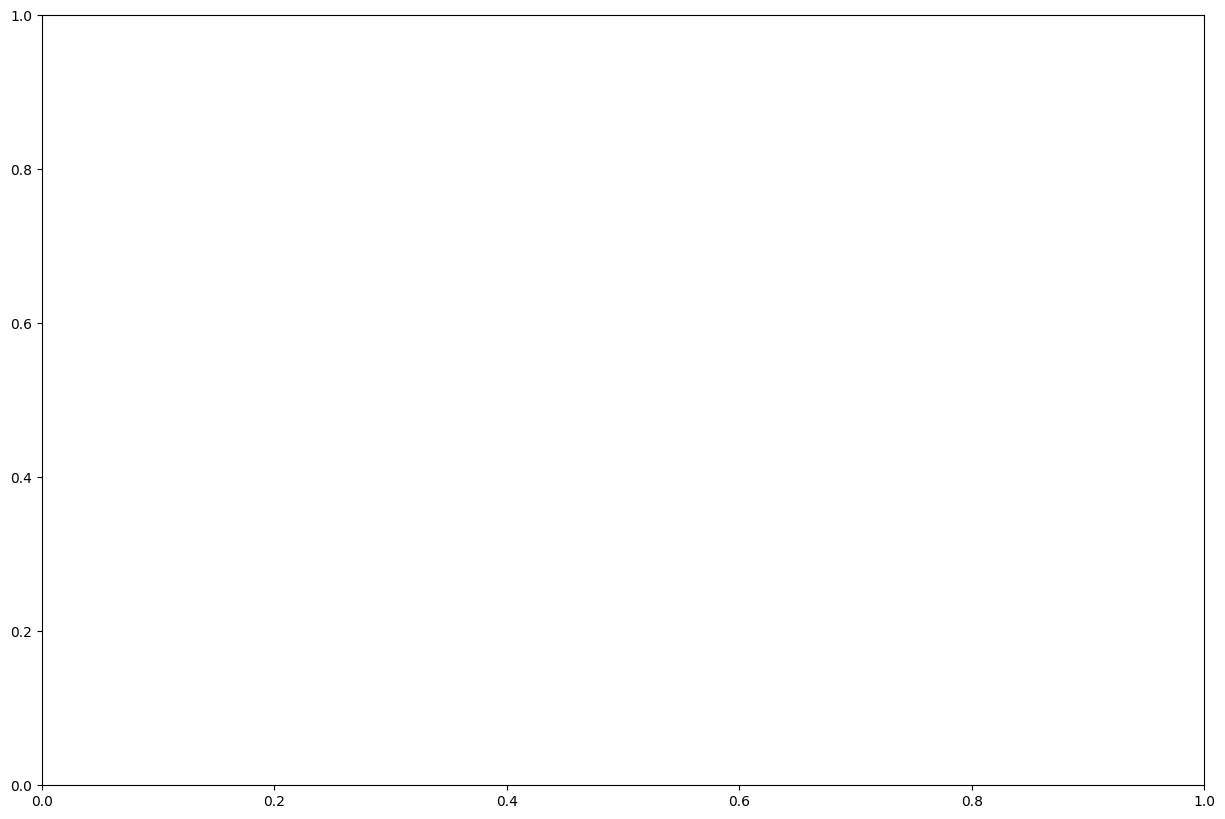

In [12]:
# Required Libraries
import pandas as pd
import geopandas as gpd

# File paths (adjust these as necessary)
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
cbsa_shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\tl_2023_us_cbsa.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)
print("Zillow Data Sample:\n", data.head())

# Extract only the date columns (excluding non-date columns)
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in data.columns if col not in non_date_columns]
print(f"Date Columns: {date_columns[:5]} ... {date_columns[-5:]}")  # Show a few date columns for reference

# Melt the data so that each date column becomes a row entry in a new 'Date' column
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')

# Convert the 'Date' column to datetime format
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')
print("Transformed Data Sample After Date Conversion:\n", data_long.head())

# Load the CBSA shapefile using Geopandas
cbsa_geo = gpd.read_file(cbsa_shapefile_path)
print("CBSA Shapefile Data Sample:\n", cbsa_geo.head())

# Display available columns in the CBSA shapefile to check for compatibility
print("CBSA Shapefile Columns:", cbsa_geo.columns)

# Standardize the 'NAME' column in the shapefile to match Zillow 'RegionName'
cbsa_geo['RegionName'] = cbsa_geo['NAME'].apply(lambda x: x.title())

# Check for unique state names in both datasets to ensure matching
unique_region_names = data_long['RegionName'].unique()
unique_shapefile_names = cbsa_geo['RegionName'].unique()

# Print unique RegionName values for comparison
print("Unique Region Names in Zillow Data:\n", unique_region_names)
print("Unique Region Names in CBSA Shapefile:\n", unique_shapefile_names)

# If necessary, create a mapping dictionary between 'RegionName' in Zillow and 'NAME' in CBSA
# Example: {'Zillow Region Name': 'CBSA Name'}
region_mapping = {
    'Saginaw': 'Saginaw, Mi',
    'St. Louis': 'St. Louis, Mo-Il',
    'Salina': 'Salina, Ks',
    'San Jose': 'San Jose-Sunnyvale-Santa Clara, Ca',
    'San Juan': 'San Juan-Bayamón-Caguas, Pr',
    'Santa Rosa': 'Santa Rosa-Petaluma, Ca',
    'Savannah': 'Savannah, Ga',
    'Scranton': 'Scranton--Wilkes-Barre, Pa',
    # Add other mappings as necessary
}

# Apply mapping to Zillow data to match with shapefile names
data_long['RegionName'] = data_long['RegionName'].replace(region_mapping)

# Merge the geometrical data with the Zillow data
merged_data = cbsa_geo.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Check for missing or incorrect date values
print("Merged Data Sample After Merge:\n", merged_data.head())
print("Unique Dates in Merged Data:\n", merged_data['Date'].unique())

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a function to update the map for each date frame
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by CBSA\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot the CBSA boundaries
    cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')
    
    # Remove axis
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    anim = FuncAnimation(fig, update, frames=dates, repeat=False)

    # Save the animation to a video file
    output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_cbsa_animation.mp4"
    anim.save(output_path, writer='ffmpeg', fps=2)

    print(f"Animation saved as {output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


Zillow Data Sample:
    RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  188275.958362   
1        54         1         Texas      state        NaN  111198.886345   
2        14         2       Florida      state        NaN  106961.891667   
3        43         3      New York      state        NaN  153909.362354   
4        47         4  Pennsylvania      state        NaN   99440.385196   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  188908.810055  189763.314808  191618.189838  193774.202640  ...   
1  111259.314692  111288.623387  111434.085040  111528.288287  ...   
2  107193.581081  107474.434834  108045.338277  108660.996118  ...   
3  154457.430871  154985.035203  156119.768693  157293.812224  ...   
4   99653.080649   99852.957241  100260.275364  100678.693064  ...   

      2023-11-30     2023-12-31     2024-01-31     2024-02-29     2024-03-31  \
0  754055.377884  756

MovieWriter ffmpeg unavailable; using Pillow instead.


CBSA Shapefile Data Sample:
   CSAFP CBSAFP  GEOID         GEOIDFQ               NAME  \
0  None  34060  34060  310M700US34060     Morgantown, WV   
1   446  34140  34140  310M700US34140         Moscow, ID   
2   393  34180  34180  310M700US34180     Moses Lake, WA   
3   147  34300  34300  310M700US34300  Mountain Home, ID   
4  None  34500  34500  310M700US34500   Mount Vernon, IL   

                       NAMELSAD LSAD MEMI  MTFCC       ALAND     AWATER  \
0     Morgantown, WV Metro Area   M1    1  G3110  2613054286   21658594   
1         Moscow, ID Micro Area   M2    2  G3110  2786483033    2369979   
2     Moses Lake, WA Micro Area   M2    2  G3110  6939995086  289820268   
3  Mountain Home, ID Micro Area   M2    2  G3110  7964417379   68330393   
4   Mount Vernon, IL Micro Area   M2    2  G3110  1479490501   32550293   

      INTPTLAT      INTPTLON  \
0  +39.5251551  -079.8019121   
1  +46.8189202  -116.7309737   
2  +47.2136328  -119.4677880   
3  +43.3946984  -115.4712050   

ValueError: unknown file extension: .mp4

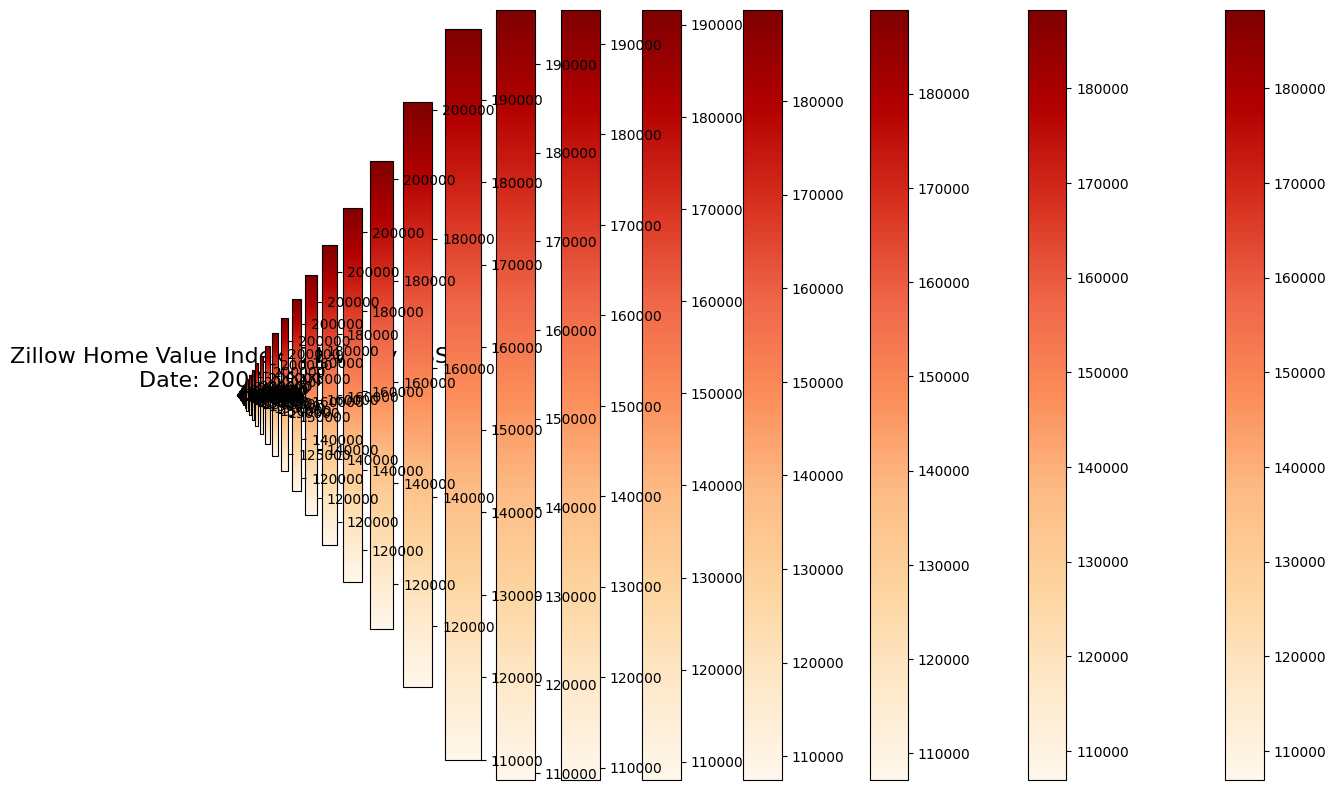

In [13]:
# Required Libraries
import pandas as pd
import geopandas as gpd

# File paths
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
cbsa_shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\tl_2023_us_cbsa.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)
print("Zillow Data Sample:\n", data.head())

# Extract only the date columns (excluding non-date columns)
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in data.columns if col not in non_date_columns]
print(f"Date Columns: {date_columns[:5]} ... {date_columns[-5:]}")  # Show a few date columns for reference

# Melt the data
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')

# Convert the 'Date' column to datetime format
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')
print("Transformed Data Sample After Date Conversion:\n", data_long.head())

# Load the CBSA shapefile
cbsa_geo = gpd.read_file(cbsa_shapefile_path)
print("CBSA Shapefile Data Sample:\n", cbsa_geo.head())

# Standardize the 'NAME' column
cbsa_geo['RegionName'] = cbsa_geo['NAME'].apply(lambda x: x.title())

# Create a mapping dictionary from states to metropolitan areas
state_to_cbsa_mapping = {
    'California': 'Los Angeles-Long Beach-Anaheim, Ca',  # Example mapping
    'Texas': 'Dallas-Fort Worth-Arlington, Tx',
    'Florida': 'Miami-Fort Lauderdale-West Palm Beach, Fl',
    'New York': 'New York-Newark-Jersey City, Ny-Nj',
    'Pennsylvania': 'Philadelphia-Camden-Vineland, Pa-Nj',
    # Add other state mappings as necessary...
}

# Apply the mapping to update RegionName in data_long
data_long['RegionName'] = data_long['RegionName'].replace(state_to_cbsa_mapping)

# Merge the geometrical data with the Zillow data
merged_data = cbsa_geo.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Check merged data
print("Merged Data Sample After Merge:\n", merged_data.head())
print("Unique Dates in Merged Data:\n", merged_data['Date'].unique())

# Create a figure for the animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a function to update the map for each date frame
def update(date):
    ax.clear()
    ax.set_title(f"Zillow Home Value Index (ZHVI) by CBSA\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot the CBSA boundaries
    cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')
    
    # Remove axis
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    anim = FuncAnimation(fig, update, frames=dates, repeat=False)

    # Save the animation to a video file
    output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_cbsa_animation.mp4"
    anim.save(output_path, writer='ffmpeg', fps=2)

    print(f"Animation saved as {output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


MovieWriter ffmpeg unavailable; using Pillow instead.


Total Number of Frames (Dates): 296


ValueError: unknown file extension: .mp4

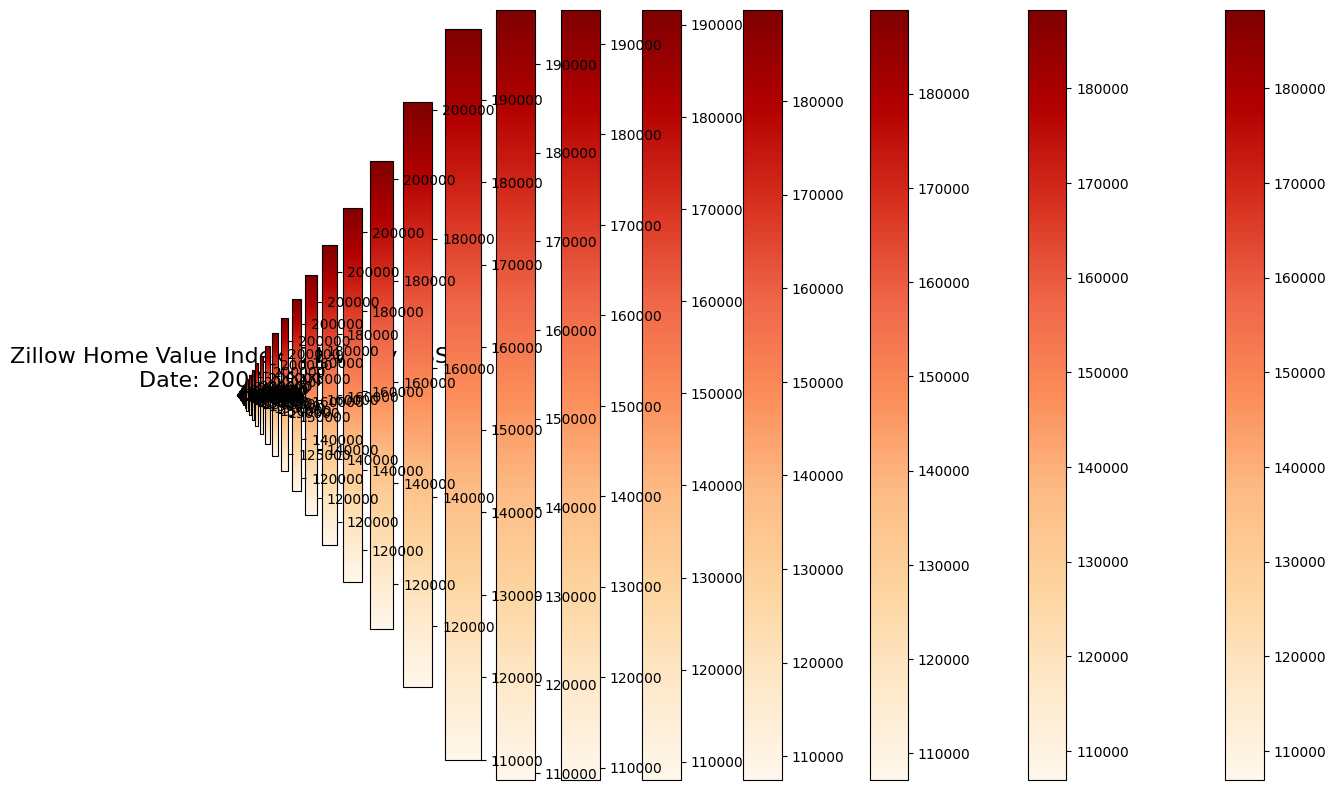

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# File paths
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
cbsa_shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\tl_2023_us_cbsa.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)

# Extract only the date columns (excluding non-date columns)
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in data.columns if col not in non_date_columns]

# Melt the data
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')

# Convert the 'Date' column to datetime format
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')

# Load the CBSA shapefile
cbsa_geo = gpd.read_file(cbsa_shapefile_path)

# Standardize the 'NAME' column
cbsa_geo['RegionName'] = cbsa_geo['NAME'].apply(lambda x: x.title())

# Create a mapping dictionary from states to metropolitan areas (fill with your mappings)
state_to_cbsa_mapping = {
    'California': 'Los Angeles-Long Beach-Anaheim, Ca',
    'Texas': 'Dallas-Fort Worth-Arlington, Tx',
    'Florida': 'Miami-Fort Lauderdale-West Palm Beach, Fl',
    'New York': 'New York-Newark-Jersey City, Ny-Nj',
    'Pennsylvania': 'Philadelphia-Camden-Vineland, Pa-Nj',
    # Add other state mappings as necessary...
}

# Apply the mapping to update RegionName in data_long
data_long['RegionName'] = data_long['RegionName'].replace(state_to_cbsa_mapping)

# Merge the geometrical data with the Zillow data
merged_data = cbsa_geo.merge(data_long, on='RegionName', how='left')

# Filter the data to remove rows without ZHVI values
merged_data = merged_data.dropna(subset=['ZHVI'])

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the static map of CBSA boundaries
cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Set up static features
ax.set_xlim([-130, -60])  # Longitude limits for the US
ax.set_ylim([20, 50])      # Latitude limits for the US
ax.axis('off')             # Turn off the axes

# Create a function to update the map for each date frame
def update(date):
    ax.clear()  # Clear the previous frame
    cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')  # Re-draw the static boundaries
    
    # Set title
    ax.set_title(f"Zillow Home Value Index (ZHVI) by CBSA\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)
    
    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]
    
    # Plot ZHVI values
    plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')

    # Set static limits and remove axis
    ax.set_xlim([-130, -60])
    ax.set_ylim([20, 50])
    ax.axis('off')

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    anim = FuncAnimation(fig, update, frames=dates, repeat=False)

    # Save the animation to a video file
    output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_cbsa_animation.mp4"
    anim.save(output_path, writer='ffmpeg', fps=2)

    print(f"Animation saved as {output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


Total Number of Frames (Dates): 1


ValueError: NaTType does not support strftime

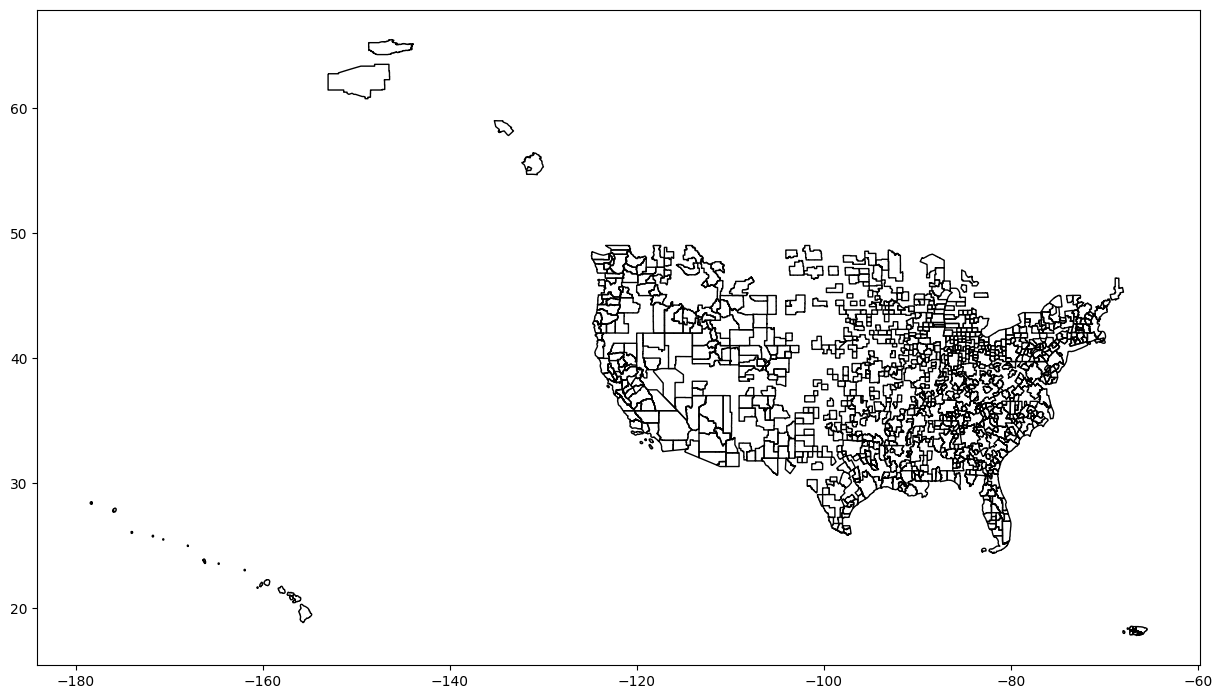

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from PIL import Image

# File paths
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
cbsa_shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\tl_2023_us_cbsa.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)

# Extract only the date columns
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in data.columns if col not in non_date_columns]

# Melt the data
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')

# Convert the 'Date' column to datetime format
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')

# Load the CBSA shapefile
cbsa_geo = gpd.read_file(cbsa_shapefile_path)

# Standardize the 'NAME' column
cbsa_geo['RegionName'] = cbsa_geo['NAME'].apply(lambda x: x.title())

# Merge the geometrical data with the Zillow data
merged_data = cbsa_geo.merge(data_long, on='RegionName', how='left')

# Create a figure for the animation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the static map of CBSA boundaries
cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')  # Draw the boundaries only once

# Set static limits and remove axis
ax.set_xlim([-130, -60])  # Longitude limits for the US
ax.set_ylim([20, 50])      # Latitude limits for the US
ax.axis('off')             # Turn off the axes

# Create a list to hold frames for the GIF
frames = []

# Create a function to update the map for each date frame
def update(date):
    ax.clear()  # Clear the previous frame
    cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')  # Re-draw the static boundaries
    
    # Set title
    ax.set_title(f"Zillow Home Value Index (ZHVI) by CBSA\nDate: {date.strftime('%Y-%m-%d')}", fontsize=16)

    # Filter data for the given date
    plot_data = merged_data[merged_data['Date'] == date]

    # Plot ZHVI values
    if not plot_data.empty:
        plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')

    # Set static limits and remove axis
    ax.set_xlim([-130, -60])
    ax.set_ylim([20, 50])
    ax.axis('off')

    # Save the current frame as an image
    plt.savefig("temp_frame.png")
    frames.append(Image.open("temp_frame.png"))  # Append the image to the frames list

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].unique()
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    for date in dates:
        update(date)

    # Create a GIF from the frames
    gif_output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_cbsa_animation.gif"
    frames[0].save(gif_output_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

    print(f"GIF saved as {gif_output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


Valid Dates: <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]
Total Number of Frames (Dates): 0
Error: No valid dates found for animation. Please check the data.


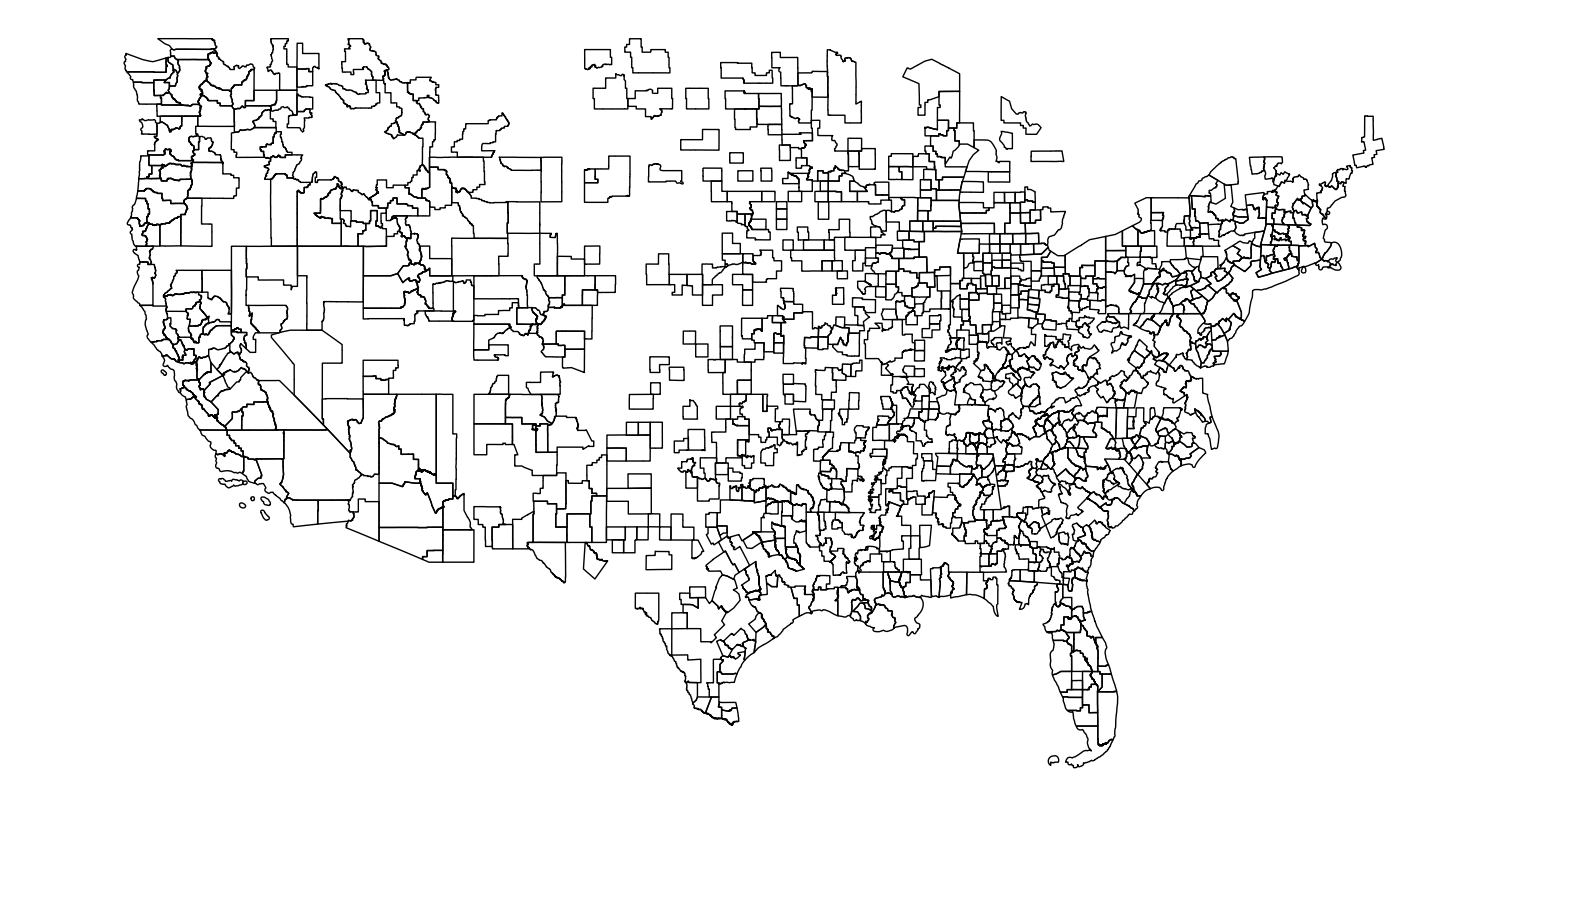

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image

# File paths
data_file_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
cbsa_shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\tl_2023_us_cbsa.shp"

# Load the Zillow data
data = pd.read_csv(data_file_path)

# Extract only the date columns
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = [col for col in data.columns if col not in non_date_columns]

# Melt the data
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')

# Convert the 'Date' column to datetime format
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')

# Load the CBSA shapefile
cbsa_geo = gpd.read_file(cbsa_shapefile_path)

# Standardize the 'NAME' column
cbsa_geo['RegionName'] = cbsa_geo['NAME'].apply(lambda x: x.title())

# Merge the geometrical data with the Zillow data
merged_data = cbsa_geo.merge(data_long, on='RegionName', how='left')

# Create a figure for the animation with a larger size
fig, ax = plt.subplots(1, 1, figsize=(20, 15))  # Adjusted figsize for better visibility

# Plot the static map of CBSA boundaries
cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')  # Draw the boundaries only once

# Set static limits and remove axis
ax.set_xlim([-130, -60])  # Longitude limits for the US
ax.set_ylim([20, 50])      # Latitude limits for the US
ax.axis('off')             # Turn off the axes

# Create a list to hold frames for the GIF
frames = []

# Create a function to update the map for each date frame
def update(date):
    ax.clear()  # Clear the previous frame
    cbsa_geo.boundary.plot(ax=ax, linewidth=1, edgecolor='black')  # Re-draw the static boundaries
    
    # Set title
    if pd.notna(date):  # Check if date is not NaT
        ax.set_title(f"Zillow Home Value Index (ZHVI) by CBSA\nDate: {date.strftime('%Y-%m-%d')}", fontsize=20)  # Adjust title font size

        # Filter data for the given date
        plot_data = merged_data[merged_data['Date'] == date]

        # Plot ZHVI values
        if not plot_data.empty:
            plot_data.plot(column='ZHVI', ax=ax, legend=True, cmap='OrRd', missing_kwds={"color": "lightgrey"}, edgecolor='0.8')

    # Set static limits and remove axis
    ax.set_xlim([-130, -60])
    ax.set_ylim([20, 50])
    ax.axis('off')

    # Save the current frame as an image
    plt.savefig("temp_frame.png")
    frames.append(Image.open("temp_frame.png"))  # Append the image to the frames list

# Create an animation for all dates available in the dataset
dates = merged_data['Date'].dropna().unique()  # Remove NaT values
print("Valid Dates:", dates)  # Print valid dates for debugging
print("Total Number of Frames (Dates):", len(dates))

# Check if dates are valid before proceeding
if len(dates) > 0:
    for date in dates:
        update(date)

    # Create a GIF from the frames
    gif_output_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\zhvi_cbsa_animation.gif"
    frames[0].save(gif_output_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

    print(f"GIF saved as {gif_output_path}")
else:
    print("Error: No valid dates found for animation. Please check the data.")


C:\Users\Nimith Narapareddy\AppData\Local\Temp\ipykernel_21644\1947095756.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=data_long['Date'].min(), end=data_long['Date'].max(), freq='M')


IndexError: list index out of range

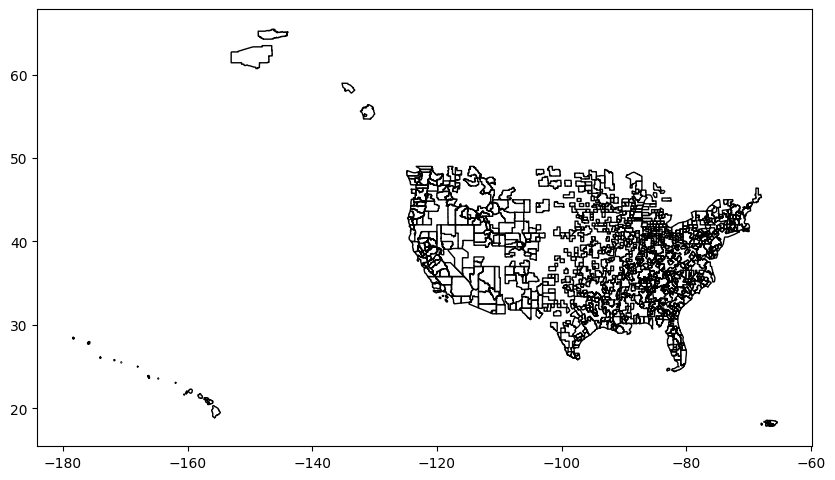

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.dates as mdates

# File paths
data_file_path = "C:\\Users\\Nimith Narapareddy\\Documents\\Python Scripts\\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
shapefile_path = "C:\\Users\\Nimith Narapareddy\\Documents\\Python Scripts\\tl_2023_us_cbsa.shp"

# Load the data
data = pd.read_csv(data_file_path)

# Prepare the Zillow data by melting and converting dates
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = data.columns.difference(non_date_columns)
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')

# Drop rows where dates couldn't be parsed
data_long = data_long.dropna(subset=['Date'])

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Ensure the RegionName in both datasets match
data_long['RegionName'] = data_long['RegionName'].str.title()
gdf['RegionName'] = gdf['NAME'].str.title()

# Merge the Zillow data with the geographical data
merged = gdf.merge(data_long, on='RegionName', how='inner')

# Set up the base map
fig, ax = plt.subplots(figsize=(10, 6))
gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

def animate(date):
    ax.clear()
    gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    merged_date = merged[merged['Date'] == date]
    merged_date.plot(column='ZHVI', ax=ax, legend=True, cmap='coolwarm', missing_kwds={'color': 'lightgrey'})
    ax.set_title(f'Zillow Home Value Index (ZHVI) - Date: {date.strftime("%Y-%m-%d")}', fontsize=15)
    ax.set_axis_off()

# Generate frames for each unique date
dates = pd.date_range(start=data_long['Date'].min(), end=data_long['Date'].max(), freq='M')
ani = FuncAnimation(fig, animate, frames=dates, repeat=False)

# Save to GIF
ani.save("C:\\Users\\Nimith Narapareddy\\Documents\\Python Scripts\\zhvi_cbsa_animation.gif", writer='pillow', fps=1)

plt.show()


In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.dates as mdates

# Load the data
data_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\tl_2023_us_cbsa.shp"
data = pd.read_csv(data_path)
gdf = gpd.read_file(shapefile_path)

# Prepare the data
data_long = pd.melt(data, id_vars=['RegionName'], var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce', format='%Y-%m-%d')  # Adjust format as necessary

# Drop rows with NaT dates
data_long.dropna(subset=['Date'], inplace=True)

# Merge with shapefile data
merged = gdf.merge(data_long, on='RegionName')

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

def update(frame):
    ax.clear()
    gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    date = frame
    filtered_data = merged[merged['Date'] == date]
    filtered_data.plot(ax=ax, column='ZHVI', cmap='viridis', legend=True)
    ax.set_title(f'Zillow Home Value Index\nDate: {date.strftime("%Y-%m-%d")}', fontsize=15)
    ax.set_aspect('auto')
    ax.set_xlim([-180, -60])  # Adjust these limits based on your actual data
    ax.set_ylim([20, 70])

dates = pd.date_range(start=data_long['Date'].min(), end=data_long['Date'].max(), freq='M')
if len(dates) > 0:
    ani = FuncAnimation(fig, update, frames=dates, repeat=False)
    ani.save(r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif', writer='pillow', fps=2)
    plt.show()
else:
    print("No valid dates found for animation.")


KeyError: 'RegionName'

Data columns: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
       '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31'],
      dtype='object', length=301)
GeoDataFrame columns: Index(['CSAFP', 'CBSAFP', 'GEOID', 'GEOIDFQ', 'NAME', 'NAMELSAD', 'LSAD',
       'MEMI', 'MTFCC', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')
Unique RegionNames in data_long: ['California' 'Texas' 'Florida' 'New York' 'Pennsylvania' 'Illinois'
 'Ohio' 'Georgia' 'North Carolina' 'Michigan' 'New Jersey' 'Virginia'
 'Washington' 'Arizona' 'Massachusetts' 'Tennessee' 'Indiana' 'Maryland'
 'Missouri' 'Wisconsin' 'Colorado' 'Minnesota' 'South Carolina' 'Alabama'
 'Louisiana' 'Kentucky' 'Oregon' 'Oklahoma' 'Connecticut' 'Utah' 'Iowa'
 'Nevada' 'Arkansas' 'Mississippi' 'Kansas' 'New

C:\Users\Nimith Narapareddy\AppData\Local\Temp\ipykernel_21644\1992377661.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')


No valid dates found for animation.


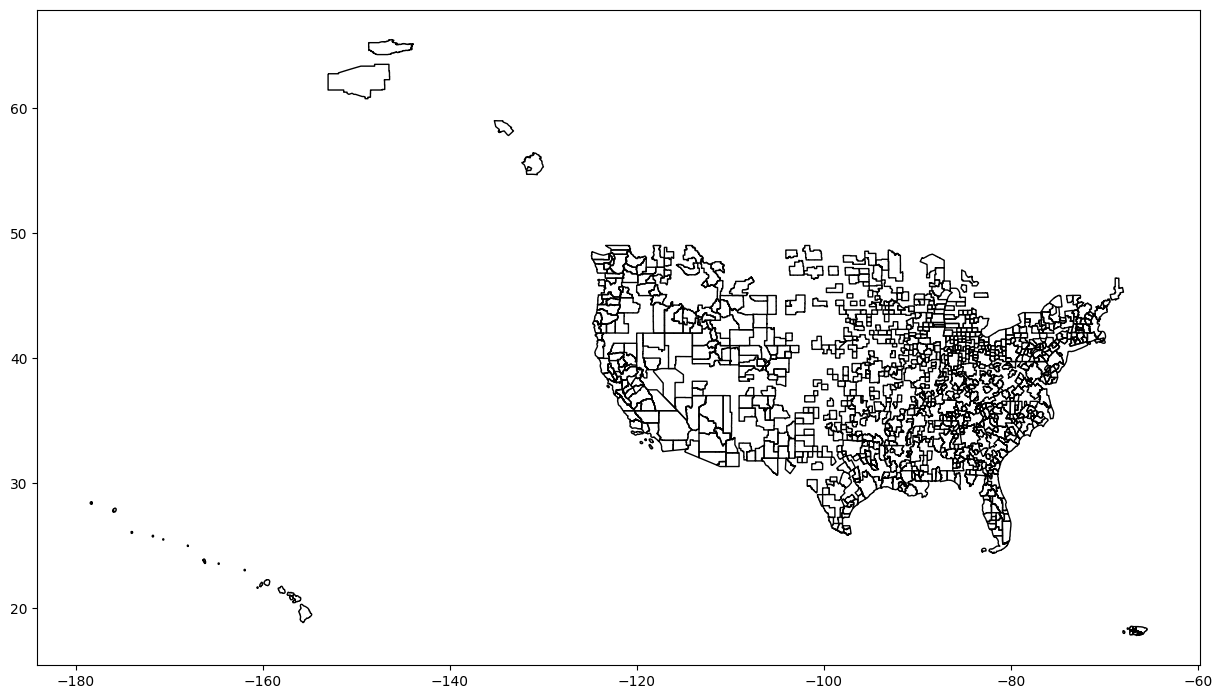

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the data
data_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\tl_2023_us_cbsa.shp"  # Updated to a state-level shapefile
data = pd.read_csv(data_path)
gdf = gpd.read_file(shapefile_path)

# Print columns to identify matching columns
print("Data columns:", data.columns)
print("GeoDataFrame columns:", gdf.columns)

# Prepare the data
data_long = pd.melt(data, id_vars=['RegionName'], var_name='Date', value_name='ZHVI')

# Convert 'Date' to datetime
data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')

# Drop rows with NaT dates
data_long.dropna(subset=['Date'], inplace=True)

# Check for matching columns in gdf
if 'NAME' in gdf.columns:
    gdf.rename(columns={'NAME': 'RegionName'}, inplace=True)
elif 'STATE_NAME' in gdf.columns:
    gdf.rename(columns={'STATE_NAME': 'RegionName'}, inplace=True)
else:
    print("No matching 'RegionName' column found in the GeoDataFrame.")
    # You may need to adjust the shapefile or column names

# Ensure 'RegionName' columns match in format
print("Unique RegionNames in data_long:", data_long['RegionName'].unique())
print("Unique RegionNames in gdf:", gdf['RegionName'].unique())

# Merge with shapefile data
merged = gdf.merge(data_long, on='RegionName')

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 10))
gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

def update(frame):
    ax.clear()
    gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    date = frame
    filtered_data = merged[merged['Date'] == date]
    if not filtered_data.empty:
        filtered_data.plot(ax=ax, column='ZHVI', cmap='viridis', legend=True)
        ax.set_title(f'Zillow Home Value Index\nDate: {date.strftime("%Y-%m-%d")}', fontsize=15)
        ax.set_axis_off()
    else:
        print(f"No data available for {date.strftime('%Y-%m-%d')}")

# Generate a list of unique dates in the data
dates = sorted(merged['Date'].unique())
if len(dates) > 0:
    ani = FuncAnimation(fig, update, frames=dates, repeat=False)
    ani.save(r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif', writer='pillow', fps=2)
    plt.show()
else:
    print("No valid dates found for animation.")


In [21]:
import pandas as pd
import geopandas as gpd

# File paths
data_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
shapefile_path = r"C:\Users\Nimith Narapareddy\Documents\Python Scripts\cb_2018_us_state_500k\cb_2018_us_state_500k.shp"

# Load the data
data = pd.read_csv(data_path)
gdf = gpd.read_file(shapefile_path)

# Inspect the data columns
print("Data columns:", data.columns.tolist())
print("GeoDataFrame columns:", gdf.columns.tolist())


Data columns: ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31', '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30', '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31', '2004-11-30', '2004-12-31', '2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30', '2005-05-31', '2005-06-3

In [22]:
# Identify non-date columns
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']

# Identify date columns
date_columns = [col for col in data.columns if col not in non_date_columns]

print("First 5 date columns:", date_columns[:5])


First 5 date columns: ['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31']


In [23]:
# Display sample date columns
for col in date_columns[:5]:
    print(f"Sample data from column '{col}':")
    print(data[col].head())


Sample data from column '2000-01-31':
0    188275.958362
1    111198.886345
2    106961.891667
3    153909.362354
4     99440.385196
Name: 2000-01-31, dtype: float64
Sample data from column '2000-02-29':
0    188908.810055
1    111259.314692
2    107193.581081
3    154457.430871
4     99653.080649
Name: 2000-02-29, dtype: float64
Sample data from column '2000-03-31':
0    189763.314808
1    111288.623387
2    107474.434834
3    154985.035203
4     99852.957241
Name: 2000-03-31, dtype: float64
Sample data from column '2000-04-30':
0    191618.189838
1    111434.085040
2    108045.338277
3    156119.768693
4    100260.275364
Name: 2000-04-30, dtype: float64
Sample data from column '2000-05-31':
0    193774.202640
1    111528.288287
2    108660.996118
3    157293.812224
4    100678.693064
Name: 2000-05-31, dtype: float64


In [24]:
data_long = pd.melt(data, id_vars=non_date_columns, value_vars=date_columns, var_name='Date', value_name='ZHVI')

print("Data after melting:")
print(data_long.head())


Data after melting:
   RegionID  SizeRank    RegionName RegionType  StateName        Date  \
0         9         0    California      state        NaN  2000-01-31   
1        54         1         Texas      state        NaN  2000-01-31   
2        14         2       Florida      state        NaN  2000-01-31   
3        43         3      New York      state        NaN  2000-01-31   
4        47         4  Pennsylvania      state        NaN  2000-01-31   

            ZHVI  
0  188275.958362  
1  111198.886345  
2  106961.891667  
3  153909.362354  
4   99440.385196  


In [25]:
# Convert 'Date' to datetime
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%Y-%m-%d', errors='coerce')

# Check for NaT values
num_nat = data_long['Date'].isna().sum()
print(f"Number of NaT values in 'Date' column: {num_nat}")

# If there are NaT values, inspect them
if num_nat > 0:
    print("Rows with NaT in 'Date':")
    print(data_long[data_long['Date'].isna()].head())


Number of NaT values in 'Date' column: 0


In [26]:
# Standardize 'RegionName's
data_long['RegionName'] = data_long['RegionName'].str.strip().str.title()
gdf['RegionName'] = gdf['NAME'].str.strip().str.title()

# Check unique 'RegionName's
print("Unique 'RegionName's in data_long:", sorted(data_long['RegionName'].unique()))
print("Unique 'RegionName's in gdf:", sorted(gdf['RegionName'].unique()))


Unique 'RegionName's in data_long: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Unique 'RegionName's in gdf: ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Commonwealth Of The Northern Mariana Islands', 'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',

In [27]:
# Merge the DataFrames
merged = gdf.merge(data_long, on='RegionName', how='inner')

# Check if the merge was successful
if merged.empty:
    print("Merged DataFrame is empty. Check 'RegionName's and ensure they match.")
else:
    print("Merged DataFrame created successfully.")
    print(merged.head())


Merged DataFrame created successfully.
  STATEFP   STATENS     AFFGEOID GEOID STUSPS         NAME LSAD         ALAND  \
0      28  01779790  0400000US28    28     MS  Mississippi   00  121533519481   
1      28  01779790  0400000US28    28     MS  Mississippi   00  121533519481   
2      28  01779790  0400000US28    28     MS  Mississippi   00  121533519481   
3      28  01779790  0400000US28    28     MS  Mississippi   00  121533519481   
4      28  01779790  0400000US28    28     MS  Mississippi   00  121533519481   

       AWATER                                           geometry   RegionName  \
0  3926919758  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  Mississippi   
1  3926919758  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  Mississippi   
2  3926919758  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  Mississippi   
3  3926919758  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  Mississippi   
4  3926919758  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  Mis

In [28]:
# Check unique dates in merged DataFrame
unique_dates = merged['Date'].dropna().unique()
print(f"Number of unique dates in merged data: {len(unique_dates)}")
print("Sample dates:", sorted(unique_dates)[:5])


Number of unique dates in merged data: 296
Sample dates: [Timestamp('2000-01-31 00:00:00'), Timestamp('2000-02-29 00:00:00'), Timestamp('2000-03-31 00:00:00'), Timestamp('2000-04-30 00:00:00'), Timestamp('2000-05-31 00:00:00')]


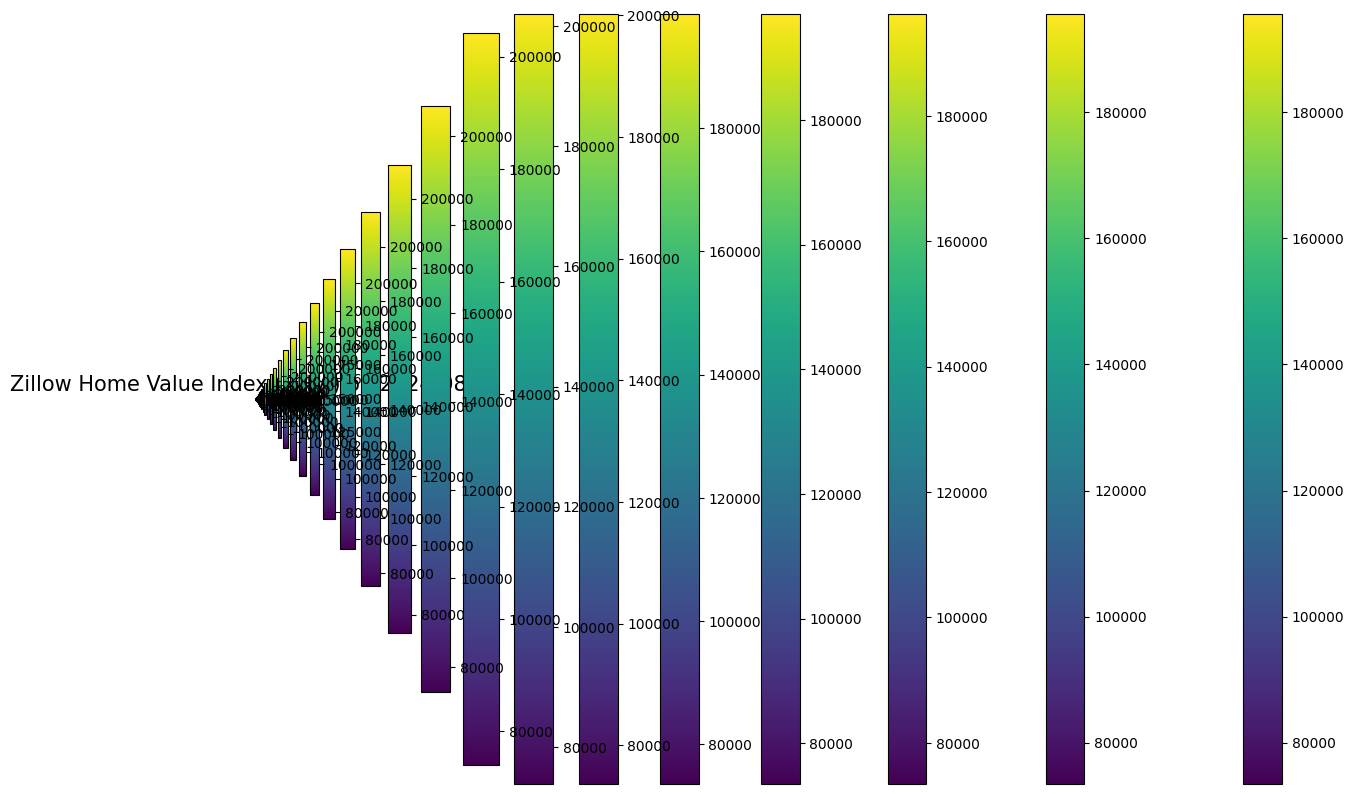

In [29]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sort dates for the animation
dates = sorted(unique_dates)

if len(dates) > 0:
    # Set up the plot
    fig, ax = plt.subplots(figsize=(15, 10))

    def update(date):
        ax.clear()
        ax.set_title(f'Zillow Home Value Index (ZHVI) on {date.strftime("%Y-%m-%d")}', fontsize=15)
        ax.set_axis_off()

        data_for_date = merged[merged['Date'] == date]
        if not data_for_date.empty:
            data_for_date.plot(ax=ax, column='ZHVI', cmap='viridis', legend=True, missing_kwds={'color': 'lightgrey'})
        else:
            print(f"No data available for {date.strftime('%Y-%m-%d')}")

    # Create the animation
    ani = FuncAnimation(fig, update, frames=dates, repeat=False)
    ani.save(r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif', writer='pillow', fps=2)
    plt.show()
else:
    print("No valid dates found for animation.")


In [30]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the data
data_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
shapefile_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\cb_2018_us_state_500k\cb_2018_us_state_500k.shp'
data = pd.read_csv(data_path)
gdf = gpd.read_file(shapefile_path)

# Prepare the data
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = data.columns.difference(non_date_columns)
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')

# Drop rows with NaT dates
data_long.dropna(subset=['Date'], inplace=True)

# Merge with shapefile data
merged = gdf.merge(data_long, on='RegionName', how='inner')

# Set up the base map
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')

# Animation function
def update(date):
    ax.clear()
    gdf.plot(ax=ax, color='white', edgecolor='black')
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=True, legend_kwds={'label': "Zillow Home Value Index (ZHVI)", 'orientation': "horizontal"})
    ax.set_title(f'ZHVI on {date.strftime("%Y-%m-%d")}')
    ax.set_axis_off()

# Sorting dates
dates = sorted(data_long['Date'].unique())

# Creating animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation
ani.save(r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif', writer='pillow', fps=2)

plt.show()


KeyError: 'RegionName'

In [31]:
import geopandas as gpd
import pandas as pd

# Load the shapefile and data
gdf = gpd.read_file(r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\cb_2018_us_state_500k\cb_2018_us_state_500k.shp')
data = pd.read_csv(r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

# Prepare the data
non_date_columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
date_columns = data.columns.difference(non_date_columns)
data_long = pd.melt(data, id_vars=['RegionName'], value_vars=date_columns, var_name='Date', value_name='ZHVI')
data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')

# Check and print column names
print("Shapefile columns:", gdf.columns)
print("Data columns:", data_long.columns)

# Ensure 'RegionName' exists and is correctly named in both dataframes
gdf['RegionName'] = gdf['NAME']  # Assuming 'NAME' is the correct column in gdf that corresponds to 'RegionName'
data_long['RegionName'] = data_long['RegionName'].str.title()  # Ensure consistent capitalization

# Merge data
merged = gdf.merge(data_long, on='RegionName', how='inner')

# Proceed with the rest of the code if the merge is successful
if not merged.empty:
    print("Merge successful!")
else:
    print("Merge resulted in an empty dataframe.")


Shapefile columns: Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
Data columns: Index(['RegionName', 'Date', 'ZHVI'], dtype='object')
Merge successful!


C:\Users\Nimith Narapareddy\AppData\Local\Temp\ipykernel_21644\1669029028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='M')


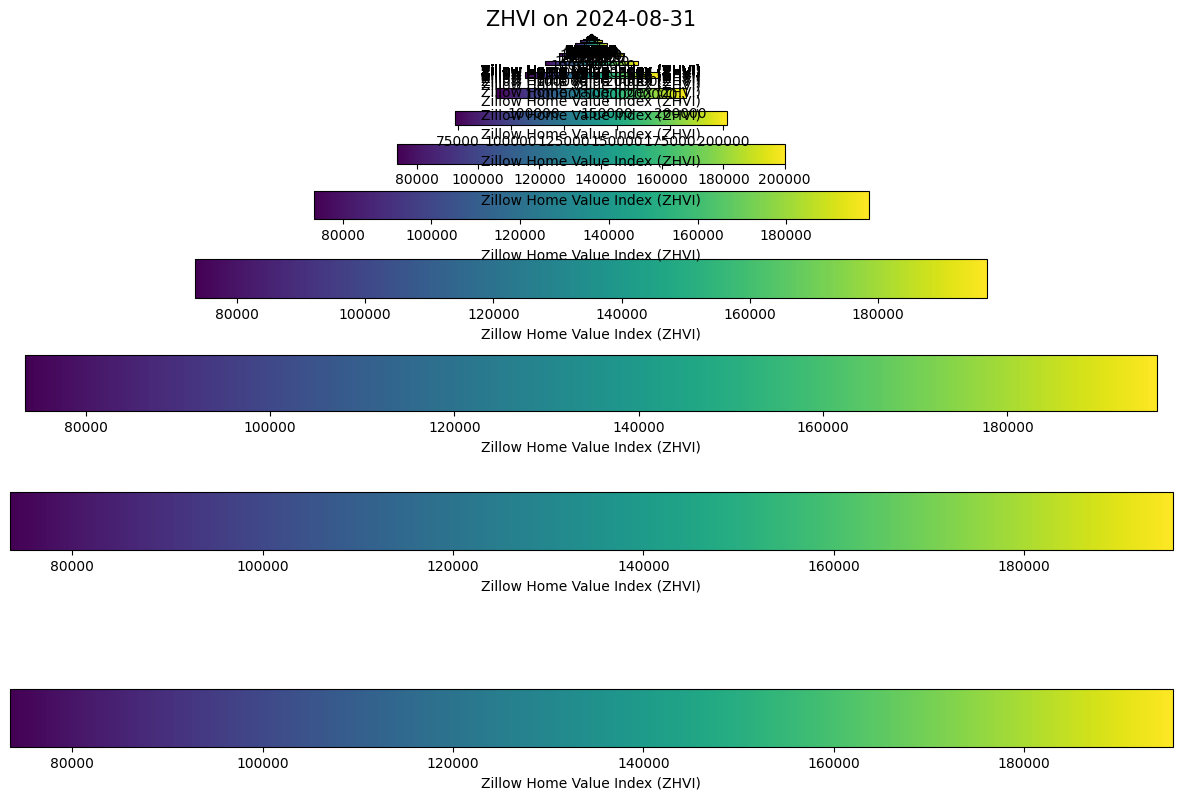

Animation saved to C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif


In [32]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the merged data (assuming 'merged' is your successful merge from the previous steps)
# Set up the plot with a static background
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')  # Static map background

def update(date):
    ax.set_title(f'ZHVI on {date.strftime("%Y-%m-%d")}', fontsize=15)
    ax.set_axis_off()

    # Filter data for the specific date and plot
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=True,
              legend_kwds={'label': "Zillow Home Value Index (ZHVI)", 'orientation': "horizontal"},
              missing_kwds={'color': 'lightgrey'})  # Plotting ZHVI values

# Sorting dates for animation frames
dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='M')

# Creating animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation
output_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif'
ani.save(output_path, writer='pillow', fps=2)

plt.show()
print(f"Animation saved to {output_path}")


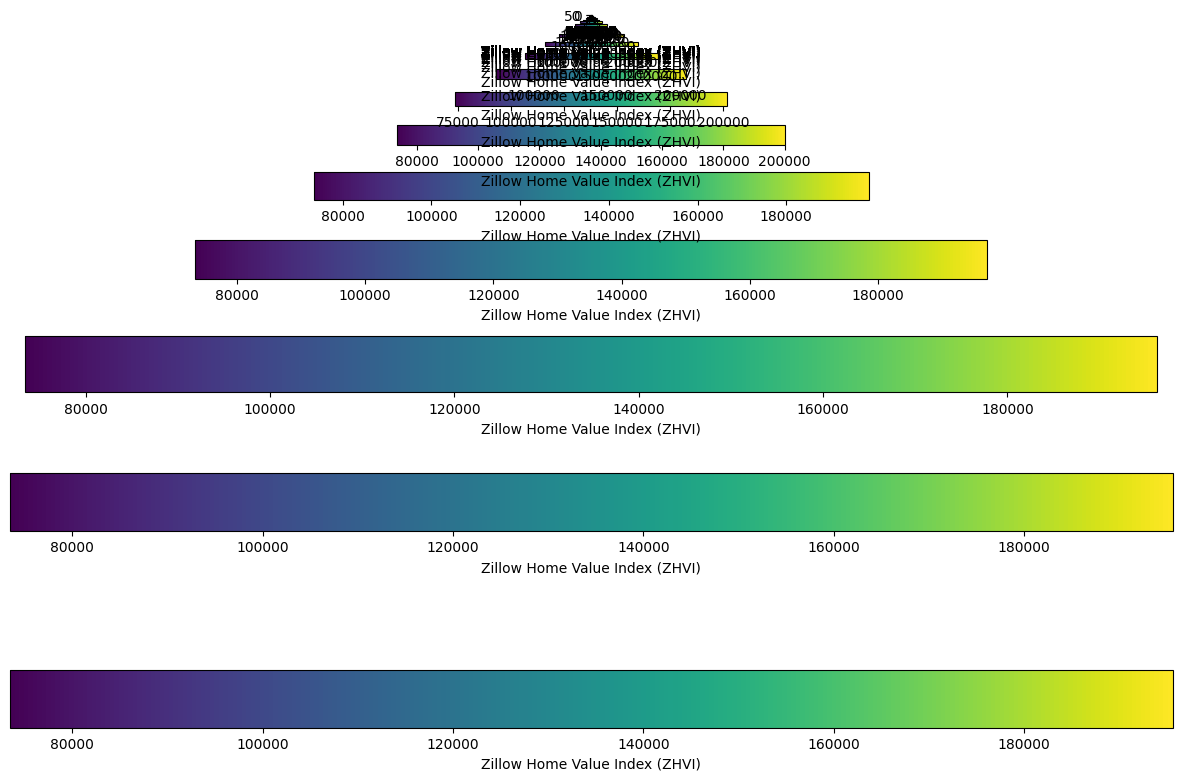

Animation saved to C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif


In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the merged data (assuming 'merged' is your successful merge from the previous steps)
# Set up the plot with a static background
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')  # Static map background

def update(date):
    ax.set_title(f'ZHVI on {date.strftime("%Y-%m-%d")}', fontsize=15)
    ax.set_axis_off()

    # Clear previous data to prevent overlap and replot static background for clarity
    ax.clear()
    gdf.plot(ax=ax, color='white', edgecolor='black')

    # Filter data for the specific date and plot
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=True,
              legend_kwds={'label': "Zillow Home Value Index (ZHVI)", 'orientation': "horizontal"},
              missing_kwds={'color': 'lightgrey'})  # Plotting ZHVI values

# Sorting dates for animation frames, using 'ME' to avoid deprecation warning
dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='ME')

# Creating animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation
output_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif'
ani.save(output_path, writer='pillow', fps=2)

plt.show()
print(f"Animation saved to {output_path}")


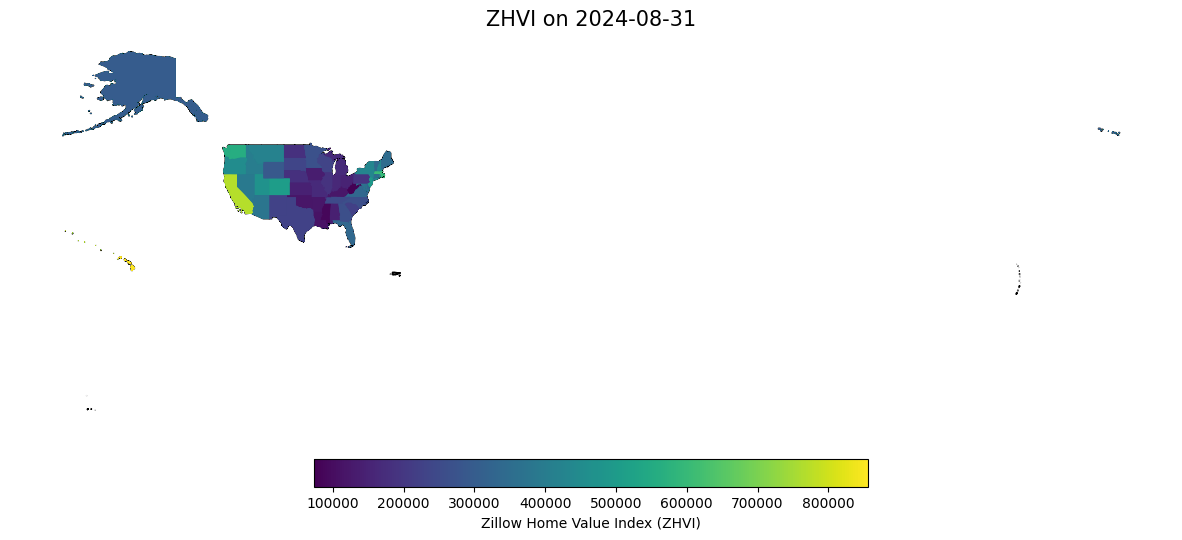

Animation saved to C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif


In [34]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the merged data
# Assuming 'merged' and 'gdf' are already loaded and ready

# Set up the base map with a static legend and colorbar setup
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')  # Static map background
ax.set_axis_off()  # Turn off axis

# Create a placeholder plot for the colorbar to link to
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=merged['ZHVI'].min(), vmax=merged['ZHVI'].max()))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Zillow Home Value Index (ZHVI)')

def update(date):
    ax.set_title(f'ZHVI on {date.strftime("%Y-%m-%d")}', fontsize=15)

    # Clear previous data plots, keeping the base map and colorbar
    [p.remove() for p in reversed(ax.patches)]

    # Filter data for the specific date and plot
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False)  # Use the static colorbar instead

# Sorting dates for animation frames, using 'ME' to avoid deprecation warning
dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='ME')

# Creating animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation
output_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif'
ani.save(output_path, writer='pillow', fps=2)

plt.show()
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x00000110368CF380> (for post_execute):


ValueError: aspect must be finite and positive 

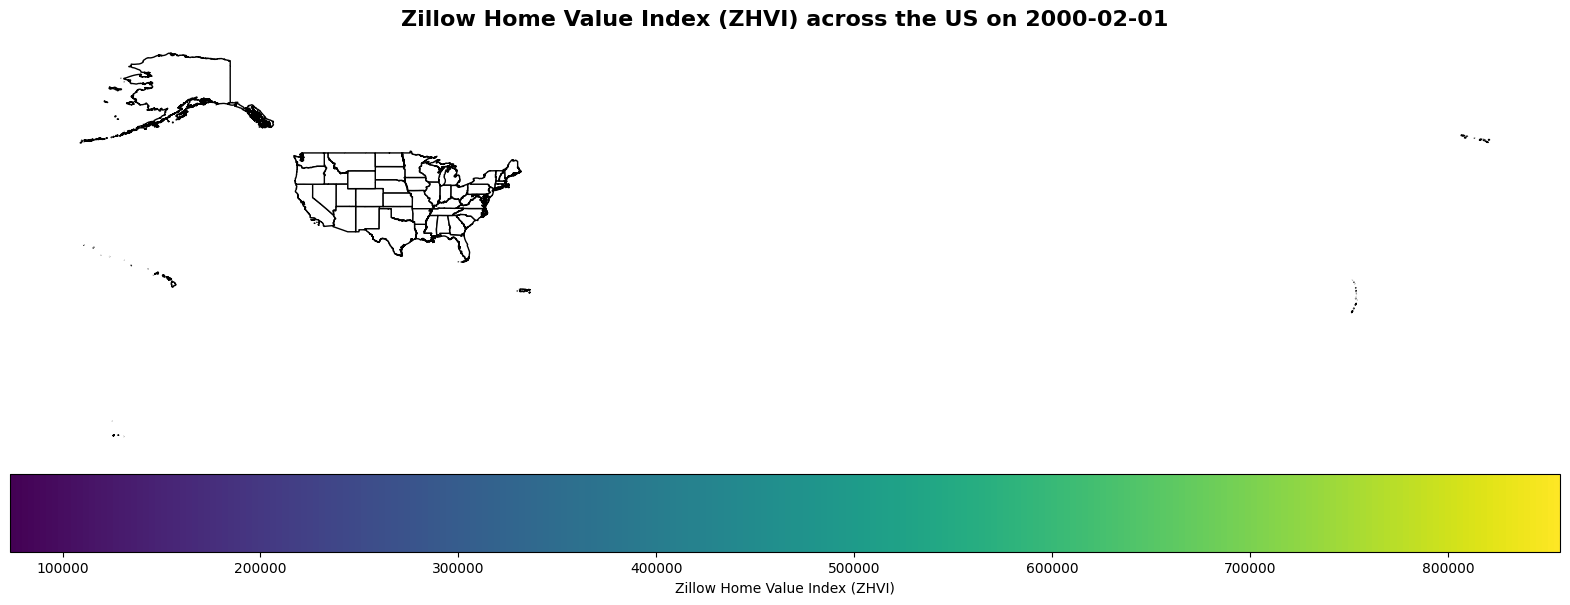

In [35]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming 'merged' and 'gdf' are already loaded and prepared
fig, ax = plt.subplots(figsize=(20, 12))  # Increased figure size for better detail visibility
gdf.plot(ax=ax, color='white', edgecolor='black')  # Static map background
ax.set_axis_off()  # Hide axes for cleaner visualization

# Static colorbar setup
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=merged['ZHVI'].min(), vmax=merged['ZHVI'].max()))
sm._A = []  # Dummy variable for ScalarMappable
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('Zillow Home Value Index (ZHVI)')

def update(date):
    ax.set_title(f'Zillow Home Value Index (ZHVI) across the US on {date.strftime("%Y-%m-%d")}', fontsize=16, fontweight='bold')
    [p.remove() for p in reversed(ax.patches)]  # Remove previous data to prevent overlap
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False)  # Use static colorbar

# Generate date range
dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='MS').tolist()

# Create the animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Calculate frames per second
total_seconds = 15
fps = len(dates) / total_seconds  # Adjust fps to fit the animation into 15 seconds

# Save the animation
output_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.mp4'
ani.save(output_path, writer='ffmpeg', fps=fps)

plt.show()
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x00000110368CF380> (for post_execute):


ValueError: aspect must be finite and positive 

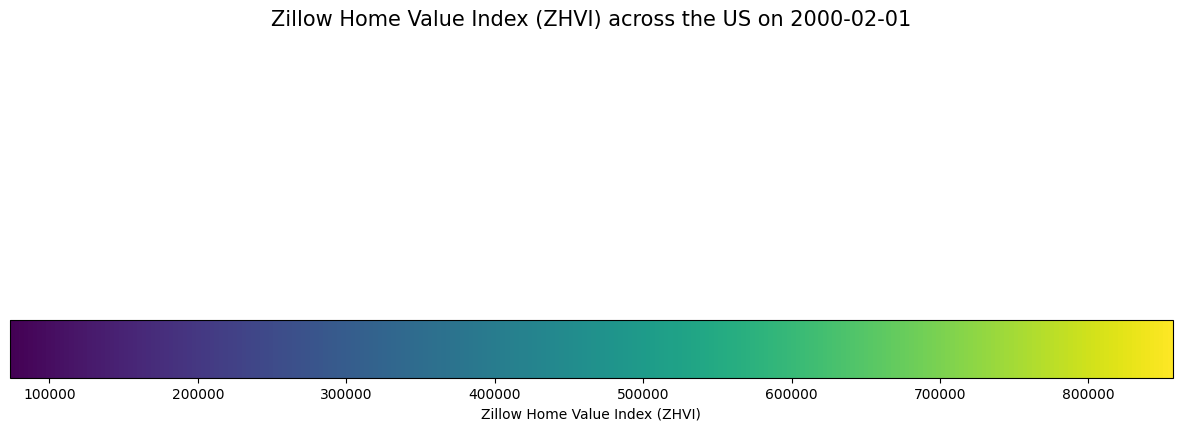

In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Load data (assuming 'merged' and 'gdf' are already prepared)
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size for better visibility
gdf.boundary.plot(ax=ax, color='none', edgecolor='black')  # Plot boundaries
ax.set_aspect('equal')  # Set equal scaling by changing the aspect ratio of the plot
ax.set_axis_off()  # Turn off axis

# Setting the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=merged['ZHVI'].min(), vmax=merged['ZHVI'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Zillow Home Value Index (ZHVI)')

def update(date):
    ax.set_title(f'Zillow Home Value Index (ZHVI) across the US on {date.strftime("%Y-%m-%d")}', fontsize=15)
    [p.remove() for p in reversed(ax.patches)]  # Clear previous frames
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False, edgecolor='black')

dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='MS').tolist()
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

output_path = 'C:\\Users\\Nimith Narapareddy\\Documents\\Python Scripts\\ZHVI_animation.mp4'
ani.save(output_path, writer='ffmpeg', fps=len(dates) / 15)  # Fit the animation into 15 seconds

plt.show()
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x00000110368CF380> (for post_execute):


ValueError: aspect must be finite and positive 

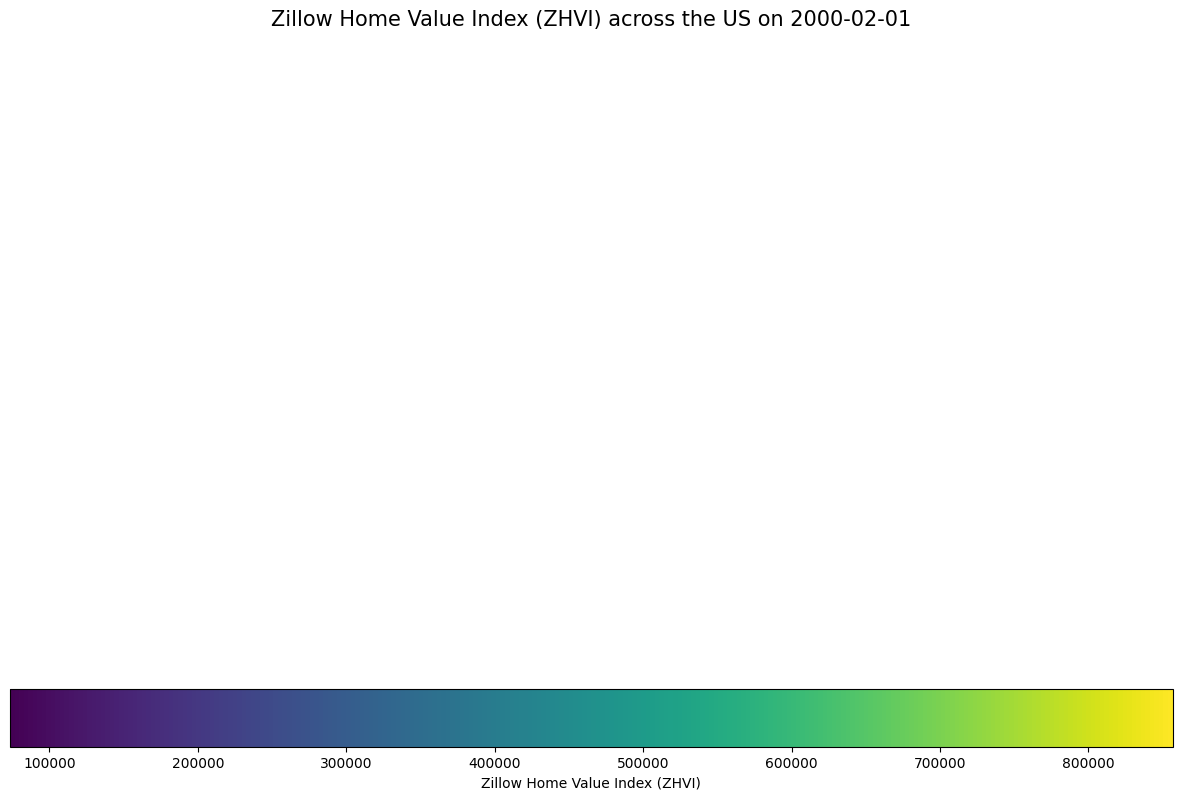

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Load data (assuming 'merged' and 'gdf' are already prepared)
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size for better visibility
gdf.boundary.plot(ax=ax, color='none', edgecolor='black')  # Plot boundaries
ax.set_aspect('auto')  # Use a fixed aspect ratio
ax.set_axis_off()  # Turn off axis

# Setting the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=merged['ZHVI'].min(), vmax=merged['ZHVI'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Zillow Home Value Index (ZHVI)')

def update(date):
    ax.set_title(f'Zillow Home Value Index (ZHVI) across the US on {date.strftime("%Y-%m-%d")}', fontsize=15)
    [p.remove() for p in reversed(ax.patches)]  # Clear previous frames
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False, edgecolor='black')

dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='MS').tolist()
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

output_path = 'C:\\Users\\Nimith Narapareddy\\Documents\\Python Scripts\\ZHVI_animation.mp4'
ani.save(output_path, writer='ffmpeg', fps=len(dates) / 15)  # Fit the animation into 15 seconds

plt.show()
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x00000110368CF380> (for post_execute):


AttributeError: 'ArtistList' object has no attribute 'clear'

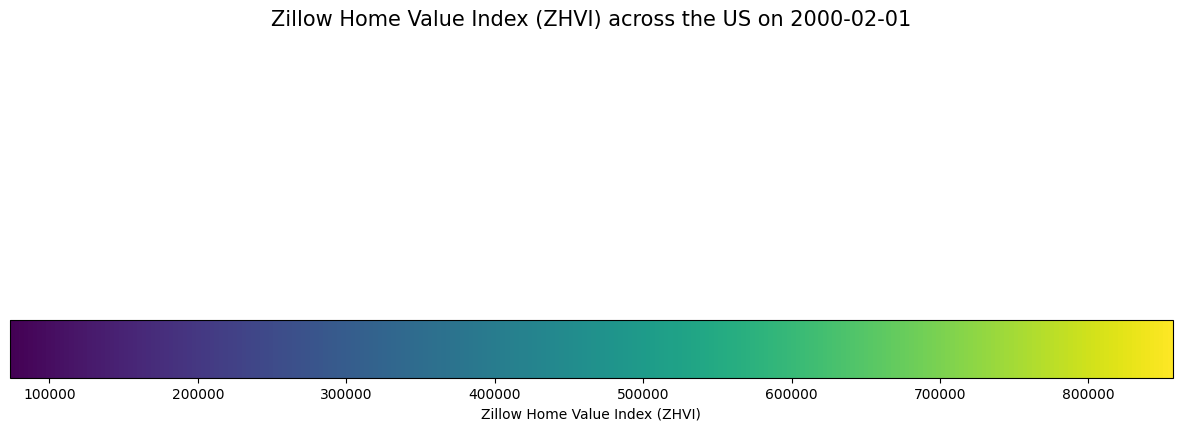

In [38]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load data (assuming 'merged' and 'gdf' are already prepared)
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size for better visibility
gdf.boundary.plot(ax=ax, color='none', edgecolor='black')  # Plot boundaries
ax.set_aspect('equal')  # Set the aspect ratio to 'equal' for geographic data
ax.set_axis_off()  # Turn off axis

# Setting the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=merged['ZHVI'].min(), vmax=merged['ZHVI'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Zillow Home Value Index (ZHVI)')

def update(date):
    ax.set_title(f'Zillow Home Value Index (ZHVI) across the US on {date.strftime("%Y-%m-%d")}', fontsize=15)
    ax.collections.clear()  # Clear previous frames
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False, edgecolor='black')

dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='MS').tolist()
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

output_path = 'C:\\Users\\Nimith Narapareddy\\Documents\\Python Scripts\\ZHVI_animation.mp4'
ani.save(output_path, writer='ffmpeg', fps=len(dates) / 15)  # Fit the animation into 15 seconds

plt.show()
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x00000110368CF380> (for post_execute):


ValueError: aspect must be finite and positive 

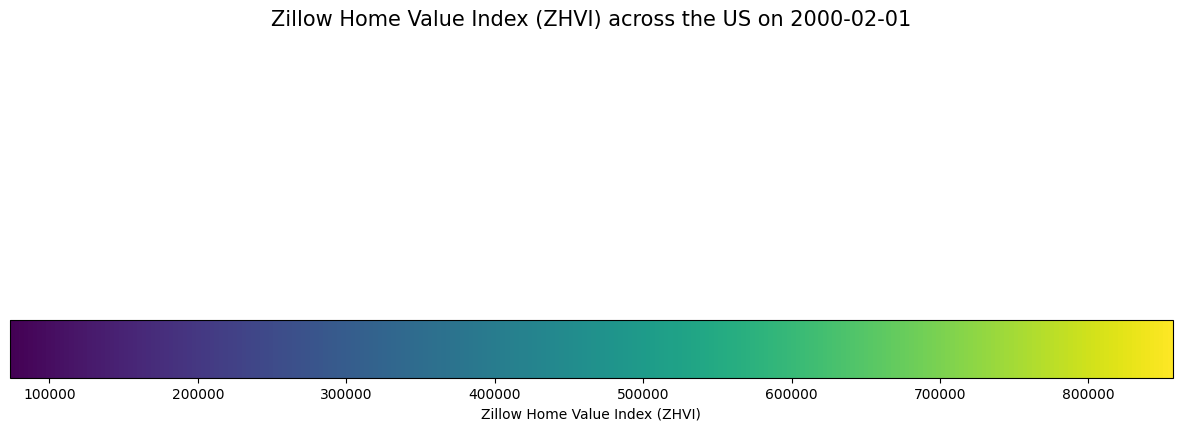

In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Load data (assuming 'merged' and 'gdf' are already prepared)
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size for better visibility
gdf.boundary.plot(ax=ax, color='none', edgecolor='black')  # Plot boundaries
ax.set_aspect('equal')  # Set equal scaling by changing the aspect ratio of the plot
ax.set_axis_off()  # Turn off axis

# Setting the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=merged['ZHVI'].min(), vmax=merged['ZHVI'].max()))
sm._A = []  # Fake up the array of the scalar mappable. Urgh...
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Zillow Home Value Index (ZHVI)')

def update(date):
    ax.set_title(f'Zillow Home Value Index (ZHVI) across the US on {date.strftime("%Y-%m-%d")}', fontsize=15)
    # Clear previous frames
    for coll in list(ax.collections):
        coll.remove()
    temp = merged[merged['Date'] == date]
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False, edgecolor='black')

# Generate a list of dates for the animation frames
dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='MS').tolist()
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Specify the output path for the video
output_path = 'ZHVI_animation.mp4'
ani.save(output_path, writer='ffmpeg', fps=len(dates) / 15)  # Fit the animation into 15 seconds

plt.show()
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


No data available for date 2000-02-01
No data available for date 2000-02-01
No data available for date 2000-03-01
No data available for date 2000-04-01
No data available for date 2000-05-01
No data available for date 2000-06-01
No data available for date 2000-07-01
No data available for date 2000-08-01
No data available for date 2000-09-01
No data available for date 2000-10-01
No data available for date 2000-11-01
No data available for date 2000-12-01
No data available for date 2001-01-01
No data available for date 2001-02-01
No data available for date 2001-03-01
No data available for date 2001-04-01
No data available for date 2001-05-01
No data available for date 2001-06-01
No data available for date 2001-07-01
No data available for date 2001-08-01
No data available for date 2001-09-01
No data available for date 2001-10-01
No data available for date 2001-11-01
No data available for date 2001-12-01
No data available for date 2002-01-01
No data available for date 2002-02-01
No data avai

ValueError: unknown file extension: .mp4

No data available for date 2000-02-01


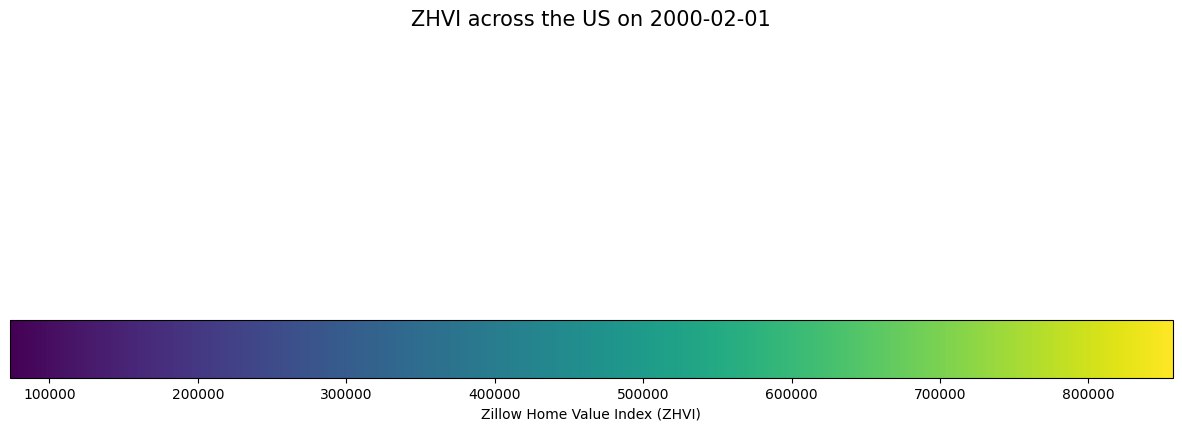

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming 'merged' and 'gdf' are already prepared and contain the necessary data.

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))
gdf.boundary.plot(ax=ax, color='none', edgecolor='black')
ax.set_aspect('equal')
ax.set_axis_off()

# Setting up the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=merged['ZHVI'].min(), vmax=merged['ZHVI'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.01)
cbar.set_label('Zillow Home Value Index (ZHVI)')

def update(date):
    ax.set_title(f'ZHVI across the US on {date.strftime("%Y-%m-%d")}', fontsize=15)
    # Remove previous collections
    for coll in list(ax.collections):
        coll.remove()
    # Filter data for the current date
    temp = merged[merged['Date'] == date]
    if temp.empty:
        print(f"No data available for date {date.strftime('%Y-%m-%d')}")
        return
    # Plot the data without changing the aspect ratio
    temp.plot(
        ax=ax,
        column='ZHVI',
        cmap='viridis',
        legend=False,
        edgecolor='black',
        aspect='auto'  # Prevent Geopandas from resetting the aspect ratio
    )

# Generate a list of dates for the animation frames
dates = pd.date_range(start=merged['Date'].min(), end=merged['Date'].max(), freq='MS').tolist()

# Create the animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Specify the output path for the video
output_path = 'ZHVI_animation.mp4'

# Ensure ffmpeg is installed and accessible
# If ffmpeg is not available, you can use 'pillow' as a writer but output will be a GIF
writer = 'ffmpeg'  # Change to 'pillow' if ffmpeg is not installed

ani.save(output_path, writer=writer, fps=len(dates) / 15)  # Fit the animation into 15 seconds

plt.show()
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x00000110368CF380> (for post_execute):


AttributeError: 'ArtistList' object has no attribute 'remove'

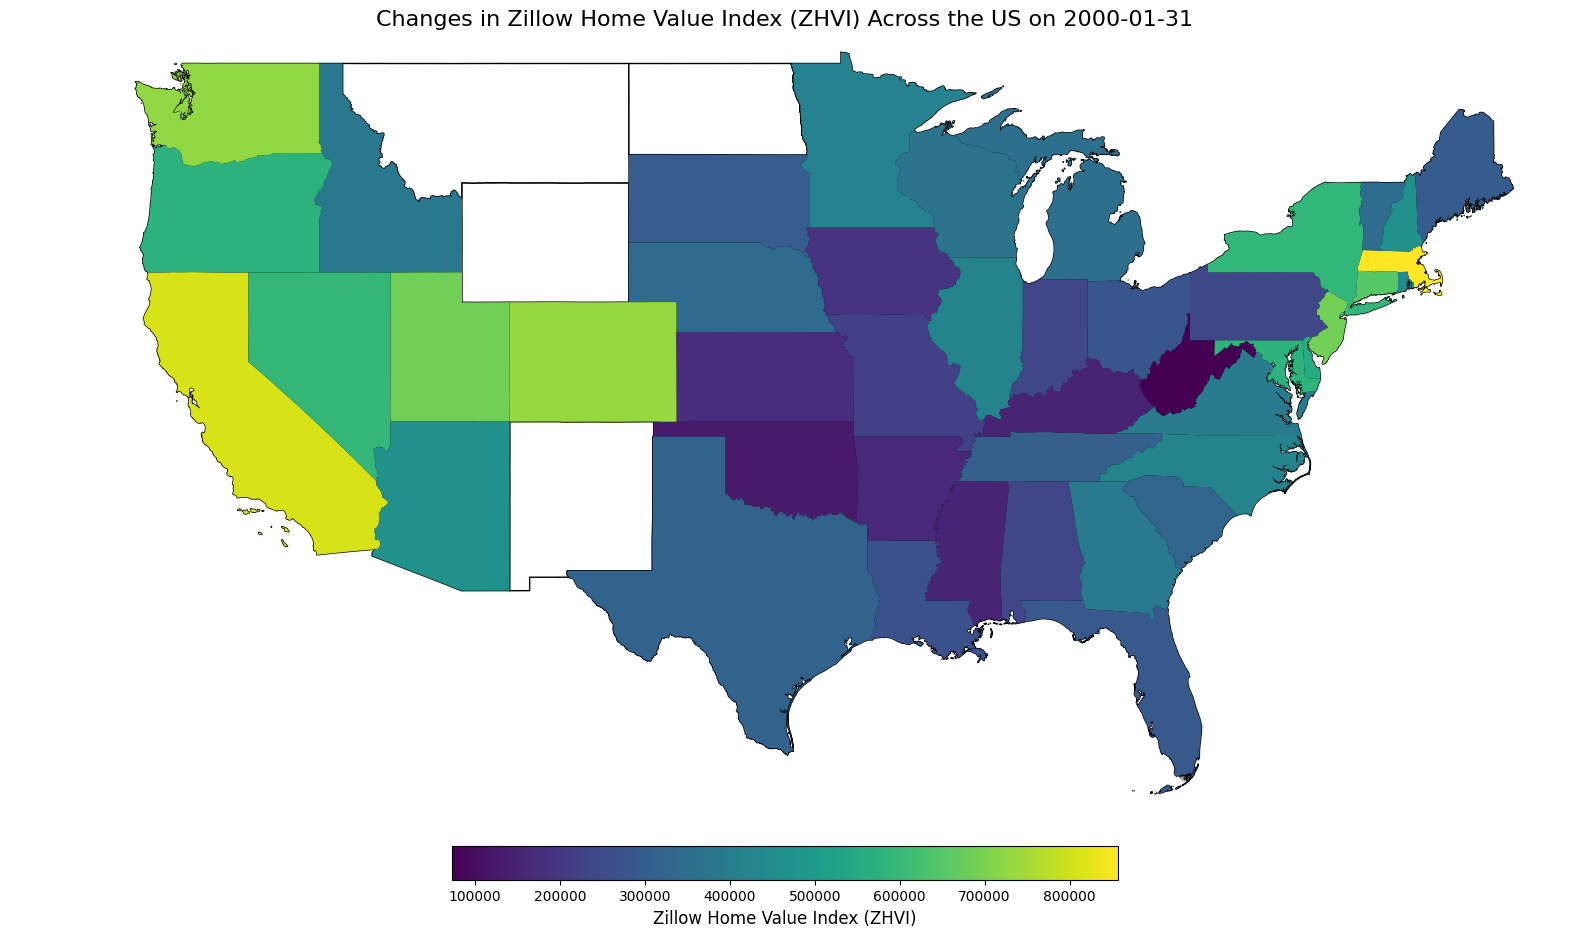

In [41]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the merged data
# Assuming 'merged' and 'gdf' are already loaded and ready

# Filter the GeoDataFrame to include only the contiguous US states
contiguous_states = gdf[~gdf['STUSPS'].isin(['AK', 'HI', 'PR'])]

# Set up the base map with a static legend and colorbar setup
fig, ax = plt.subplots(figsize=(20, 12))  # Increased figure size for better readability
contiguous_states.plot(ax=ax, color='white', edgecolor='black')  # Static map background
ax.set_axis_off()  # Turn off axis

# Set the extent to zoom in on the contiguous US
ax.set_xlim(-130, -65)  # Longitude limits
ax.set_ylim(24, 50)     # Latitude limits

# Create a placeholder for the colorbar
vmin = merged['ZHVI'].min()
vmax = merged['ZHVI'].max()
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Zillow Home Value Index (ZHVI)', fontsize=12)

def update(date):
    ax.set_title(f'Changes in Zillow Home Value Index (ZHVI) Across the US on {date.strftime("%Y-%m-%d")}', fontsize=16)
    # Clear previous data plots, keeping the base map and colorbar
    for collection in ax.collections[1:]:
        ax.collections.remove(collection)
    # Filter data for the specific date and plot
    temp = merged[merged['Date'] == date]
    temp = temp[~temp['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude non-contiguous states
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False)
    
# Use actual dates from the data, and sample every 3 months for a time-lapse effect
dates = sorted(merged['Date'].unique())
dates = dates[::3]  # Take every 3rd date to reduce frames

# Calculate fps to fit the animation into approximately 15 seconds
total_duration = 15  # seconds
fps = len(dates) / total_duration

# Create the animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation
output_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.mp4'
ani.save(output_path, writer='ffmpeg', fps=fps)

plt.show()
print(f"Animation saved to {output_path}")


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

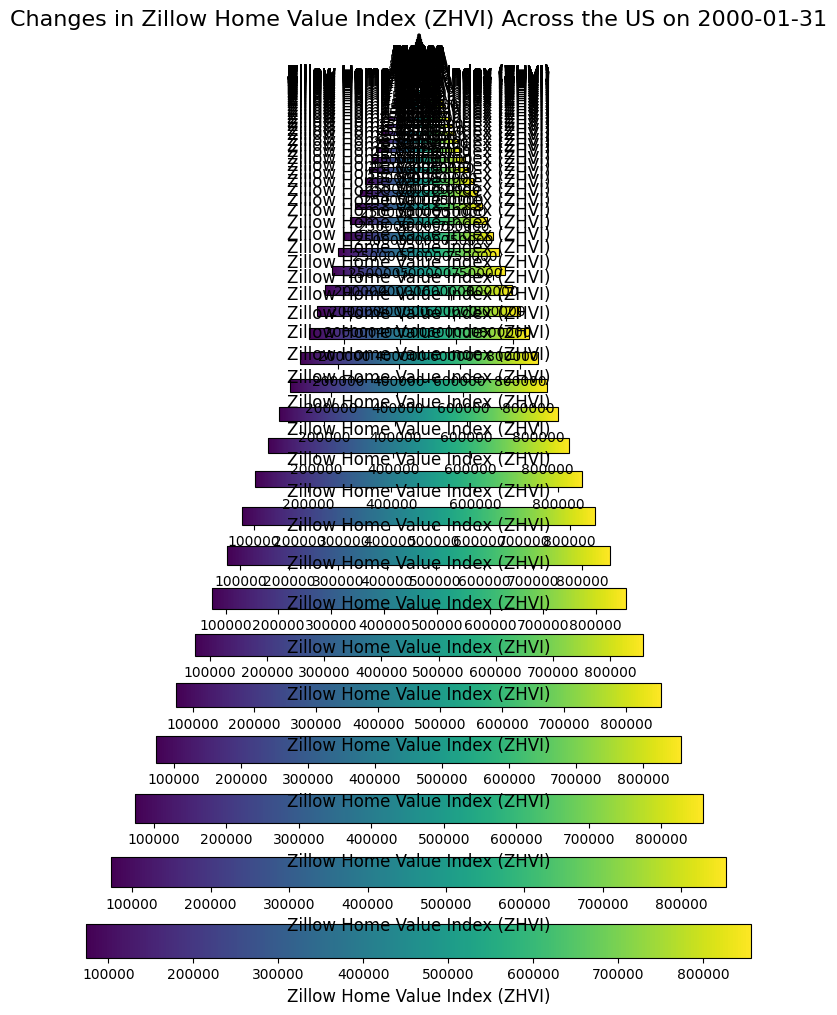

In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load the merged data
# Assuming 'merged' and 'gdf' are already loaded and ready

# Filter the GeoDataFrame to include only the contiguous US states
contiguous_states = gdf[~gdf['STUSPS'].isin(['AK', 'HI', 'PR'])]

# Set up the base map with a static legend and colorbar setup
fig, ax = plt.subplots(figsize=(20, 12))  # Increased figure size for better readability

# Create a placeholder for the colorbar
vmin = merged['ZHVI'].min()
vmax = merged['ZHVI'].max()
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Zillow Home Value Index (ZHVI)', fontsize=12)

def update(date):
    ax.clear()  # Clear the axis to remove previous frames

    # Re-plot the base map and colorbar
    contiguous_states.plot(ax=ax, color='white', edgecolor='black')
    ax.set_xlim(-130, -65)  # Longitude limits
    ax.set_ylim(24, 50)     # Latitude limits
    ax.set_axis_off()  # Turn off axis

    # Title update
    ax.set_title(f'Changes in Zillow Home Value Index (ZHVI) Across the US on {date.strftime("%Y-%m-%d")}', fontsize=16)
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
    cbar.set_label('Zillow Home Value Index (ZHVI)', fontsize=12)

    # Filter data for the specific date and plot
    temp = merged[merged['Date'] == date]
    temp = temp[~temp['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude non-contiguous states
    temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False)

# Use actual dates from the data, and sample every 3 months for a time-lapse effect
dates = sorted(merged['Date'].unique())
dates = dates[::3]  # Take every 3rd date to reduce frames

# Calculate fps to fit the animation into approximately 15 seconds
total_duration = 15  # seconds
fps = len(dates) / total_duration

# Create the animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation
output_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.mp4'
ani.save(output_path, writer='ffmpeg', fps=fps)

plt.show()
print(f"Animation saved to {output_path}")


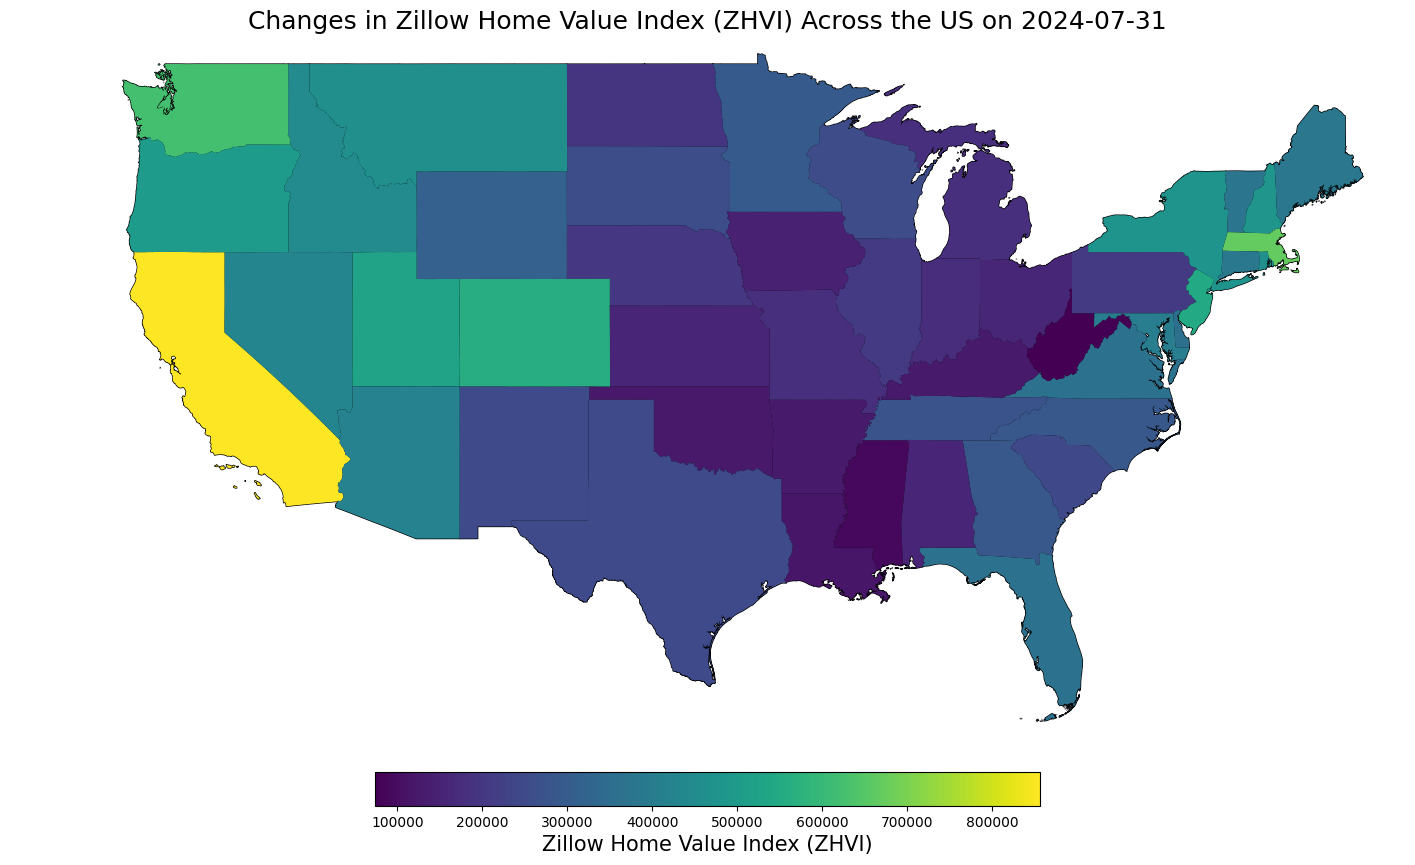

Animation saved to C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif


In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming 'merged' and 'gdf' are already loaded and prepared as DataFrames

# Filter the GeoDataFrame to include only the contiguous US states
contiguous_states = gdf[~gdf['STUSPS'].isin(['AK', 'HI', 'PR'])]

# Set up the base map with a static legend and colorbar setup
fig, ax = plt.subplots(figsize=(18, 12))  # Increased figure size for better readability

# Create a placeholder for the colorbar
vmin = merged['ZHVI'].min()
vmax = merged['ZHVI'].max()
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.04)
cbar.set_label('Zillow Home Value Index (ZHVI)', fontsize=15)

def update(date):
    # Clear the previous data but keep static elements like colorbar and map boundaries
    ax.cla()  # Use cla() to avoid clearing colorbar and axis properties

    # Re-plot the base map with boundaries
    contiguous_states.plot(ax=ax, color='white', edgecolor='black')

    # Update the title for the current date
    ax.set_title(f'Changes in Zillow Home Value Index (ZHVI) Across the US on {date.strftime("%Y-%m-%d")}', fontsize=18)
    
    # Set appropriate limits for better visualization
    ax.set_xlim(-130, -65)  # Longitude limits
    ax.set_ylim(24, 50)     # Latitude limits
    ax.set_axis_off()       # Turn off axis for cleaner visuals

    # Filter data for the specific date and plot the corresponding values
    temp = merged[merged['Date'] == date]
    temp = temp[~temp['STUSPS'].isin(['AK', 'HI', 'PR'])]  # Exclude non-contiguous states
    if not temp.empty:
        temp.plot(ax=ax, column='ZHVI', cmap='viridis', legend=False)

# Generate dates for animation, taking every 3rd date for a smoother effect
dates = sorted(merged['Date'].unique())
dates = dates[::3]  # Take every 3rd date

# Calculate fps to fit the animation into approximately 15 seconds
total_duration = 15  # seconds
fps = len(dates) / total_duration

# Create the animation
ani = FuncAnimation(fig, update, frames=dates, repeat=False)

# Save the animation as a .gif file instead of .mp4 if 'ffmpeg' is causing issues
output_path = r'C:\Users\Nimith Narapareddy\Documents\Python Scripts\ZHVI_animation.gif'
ani.save(output_path, writer='pillow', fps=fps)

plt.show()
print(f"Animation saved to {output_path}")
